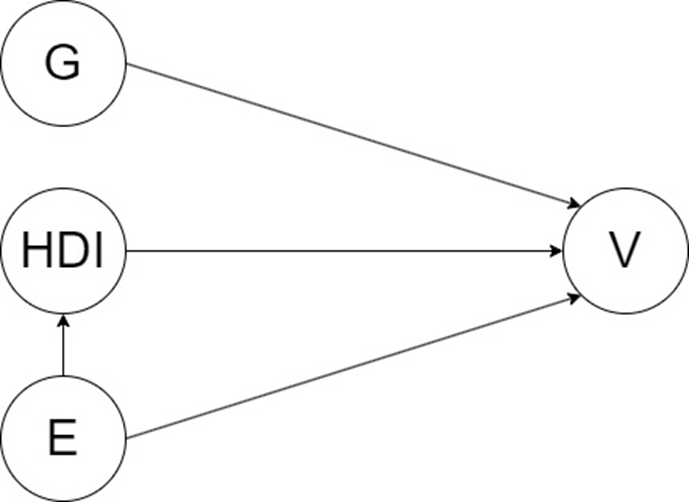

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import seaborn as sns
import arviz as az


file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)

data.head()

C:\Users\szczy\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Year    State  Democratic %  Gun ownership %    HDI  Unemployment %
0  1992  Alabama          40.9             55.2  0.839           7.525
1  1996  Alabama          43.2             56.8  0.850           5.208
2  2000  Alabama          41.6             53.8  0.853           4.625
3  2004  Alabama          36.8             51.6  0.861           5.575
4  2008  Alabama          38.7             50.3  0.867           5.883

In [4]:
plt.figure(figsize=(14, 10))

for state in data["State"].unique():
    state_data = data[data["State"] == state]
    plt.plot(state_data["Year"], state_data["Democratic %"], label=state)

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.xticks(np.linspace(1992, 2020, 8))
plt.xlim([1992, 2020])
plt.ylim([0, 100])
plt.show()

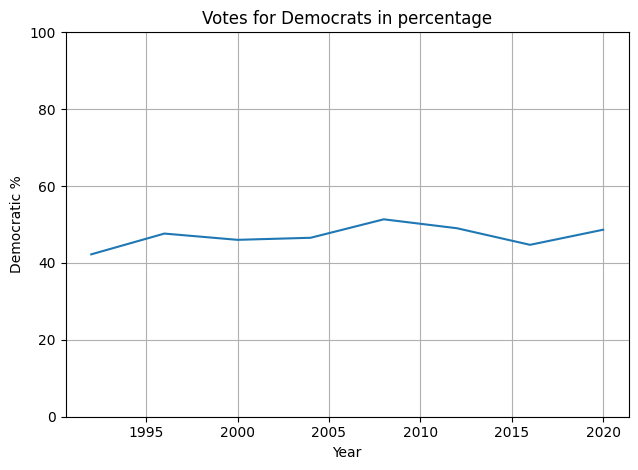

In [5]:
mean_democratic_votes = [data[data['Year'] == year]['Democratic %'].mean() for year in data["Year"].unique()]

plt.plot(data["Year"].unique(), mean_democratic_votes)

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in percentage')
plt.grid(True)
plt.tight_layout()
plt.ylim([0, 100])
plt.show()

## Checking the correlations between the predictors

In [6]:
file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)

data = data.dropna()

correlation_matrix = data[['HDI', 'Gun ownership %', 'Unemployment %', 'Democratic %']].corr()

print(correlation_matrix)

                      HDI  Gun ownership %  Unemployment %  Democratic %
HDI              1.000000        -0.444153       -0.046894      0.337227
Gun ownership % -0.444153         1.000000       -0.135404     -0.766783
Unemployment %  -0.046894        -0.135404        1.000000      0.236900
Democratic %     0.337227        -0.766783        0.236900      1.000000


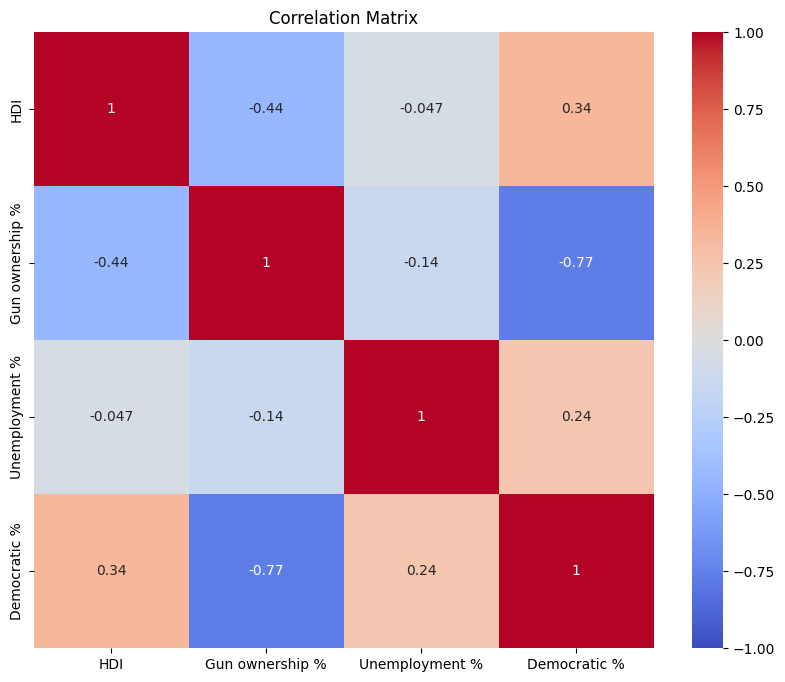

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

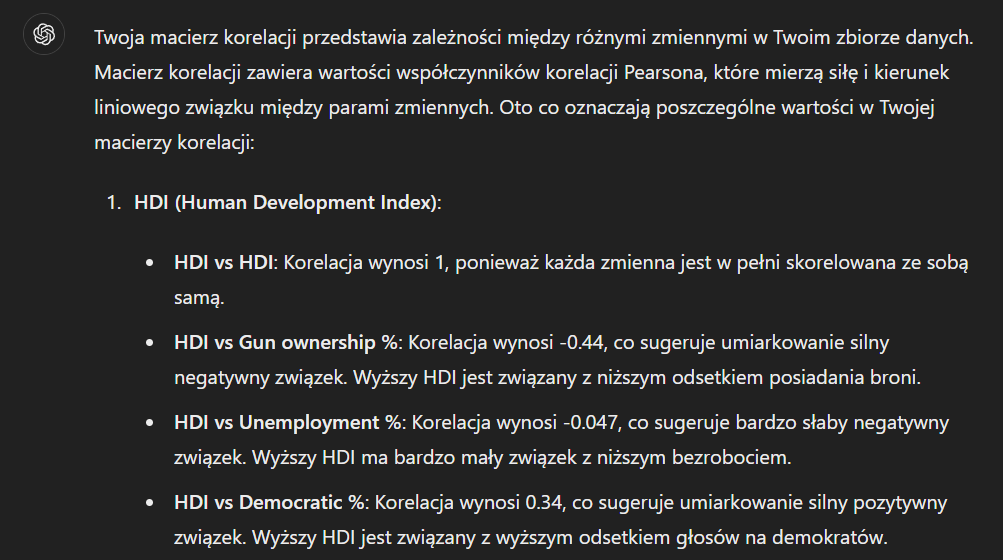
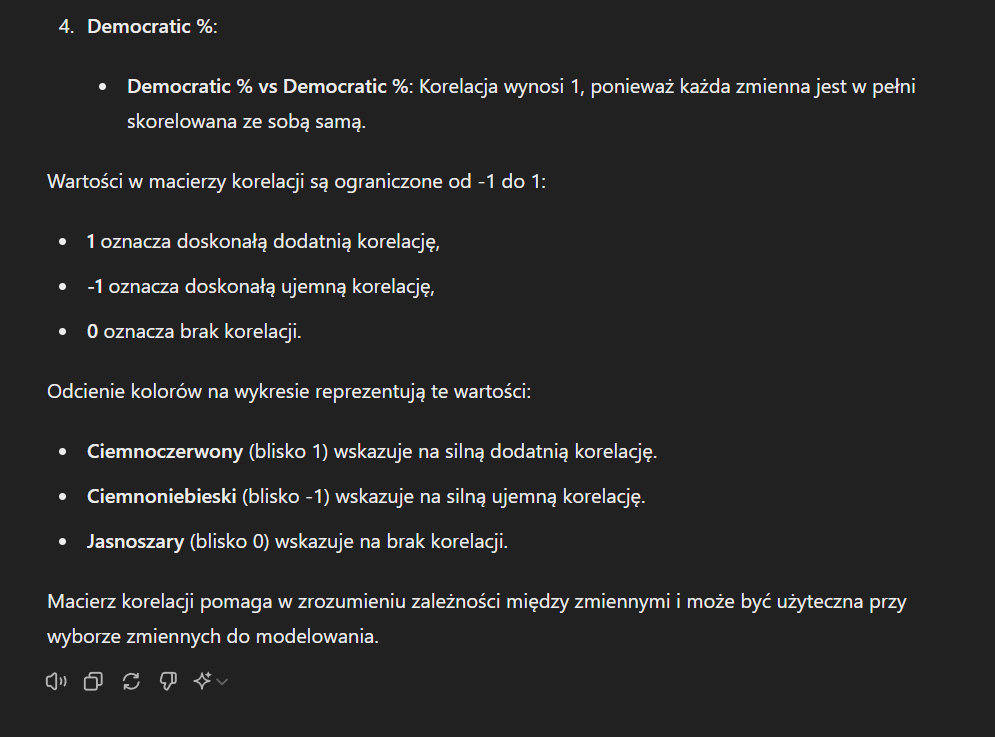
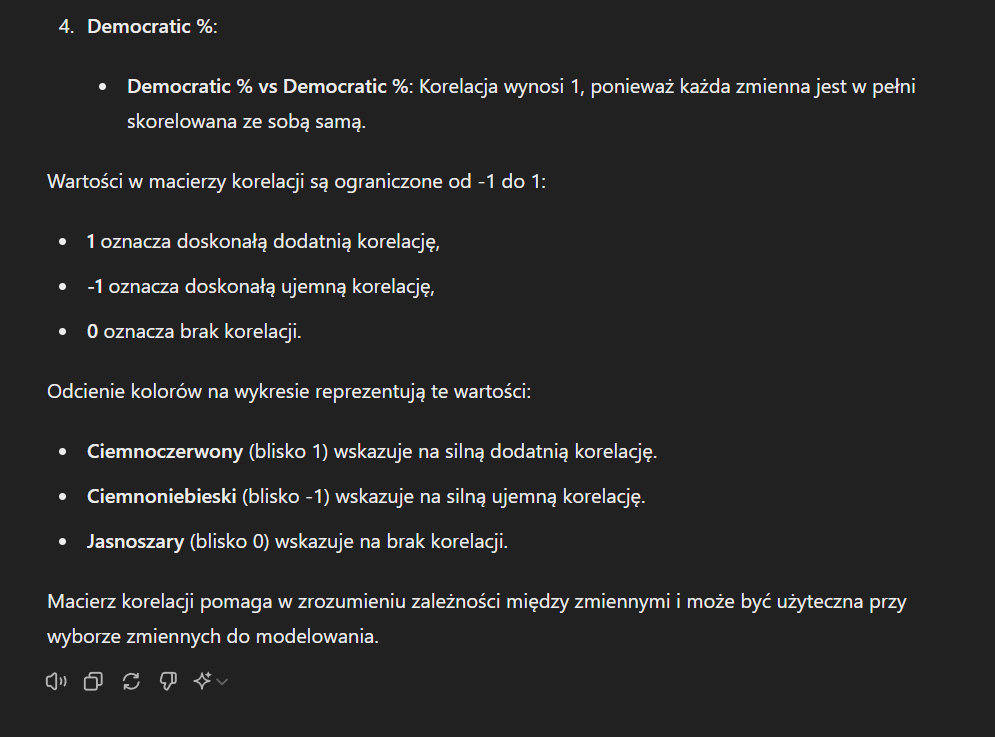

## Normal distributions of the data available

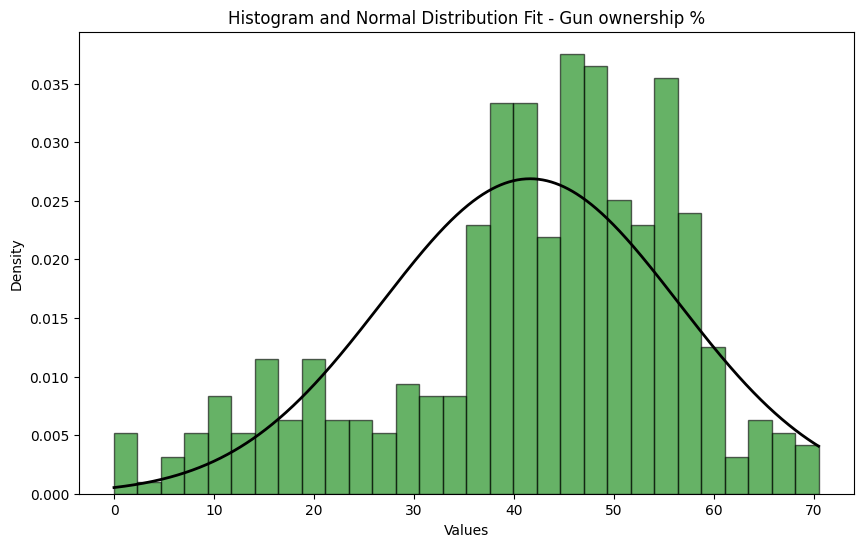

(41.635294117647064, 14.843232412210844)

In [8]:
from scipy.stats import norm

data_values = data['Gun ownership %'].values

mean = np.mean(data_values)
std_dev = np.std(data_values)

x = np.linspace(min(data_values), max(data_values), 1000)
y = norm.pdf(x, mean, std_dev)

plt.figure(figsize=(10, 6))
plt.hist(data_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, 'k', linewidth=2)
plt.title('Histogram and Normal Distribution Fit - Gun ownership %')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

mean, std_dev

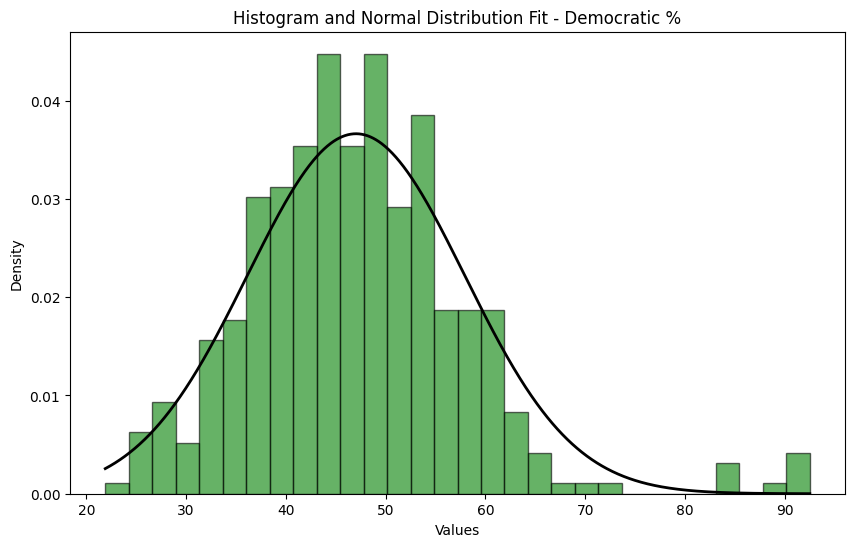

(47.02867647058824, 10.888367880955116)

In [9]:
import pandas as pd

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data_values = data['Democratic %'].values

mean = np.mean(data_values)
std_dev = np.std(data_values)

x = np.linspace(min(data_values), max(data_values), 1000)
y = norm.pdf(x, mean, std_dev)

plt.figure(figsize=(10, 6))
plt.hist(data_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, 'k', linewidth=2)
plt.title('Histogram and Normal Distribution Fit - Democratic %')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

mean, std_dev

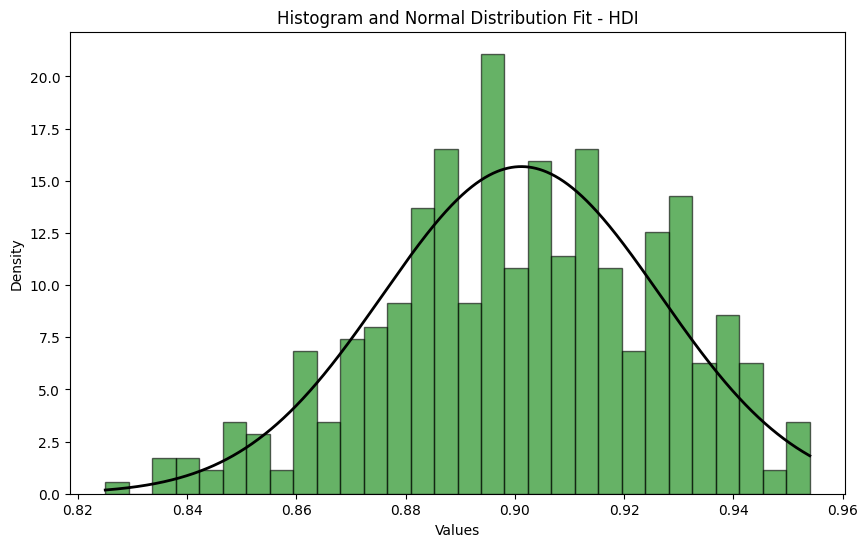

(0.9011813725490196, 0.02544277404406379)

In [10]:
import pandas as pd

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data_values = data['HDI'].values

mean = np.mean(data_values)
std_dev = np.std(data_values)

x = np.linspace(min(data_values), max(data_values), 1000)
y = norm.pdf(x, mean, std_dev)

plt.figure(figsize=(10, 6))
plt.hist(data_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, 'k', linewidth=2)
plt.title('Histogram and Normal Distribution Fit - HDI')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

mean, std_dev

In [11]:
import pandas as pd

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data_values = data['Unemployment %'].values

mean = np.mean(data_values)
std_dev = np.std(data_values)


x = np.linspace(min(data_values), max(data_values), 1000)
y = norm.pdf(x, mean, std_dev)

plt.figure(figsize=(10, 6))
plt.hist(data_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, 'k', linewidth=2)
plt.title('Histogram and Normal Distribution Fit - Unemployment %')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

mean, std_dev

(5.730723039215687, 1.8344195906518317)

In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)

X = data[['HDI', 'Gun ownership %', 'Unemployment %']]
y = data['Democratic %']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

# Obliczenie reszt
residuals = model.resid

residual_variance = np.var(residuals, ddof=1)

sigma = np.sqrt(residual_variance)

print(f"Estimated sigma: {sigma}")

                            OLS Regression Results                            
Dep. Variable:           Democratic %   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     207.3
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           2.26e-81
Time:                        15:14:17   Log-Likelihood:                -1363.0
No. Observations:                 408   AIC:                             2734.
Df Residuals:                     404   BIC:                             2750.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              59.5811     14.248     

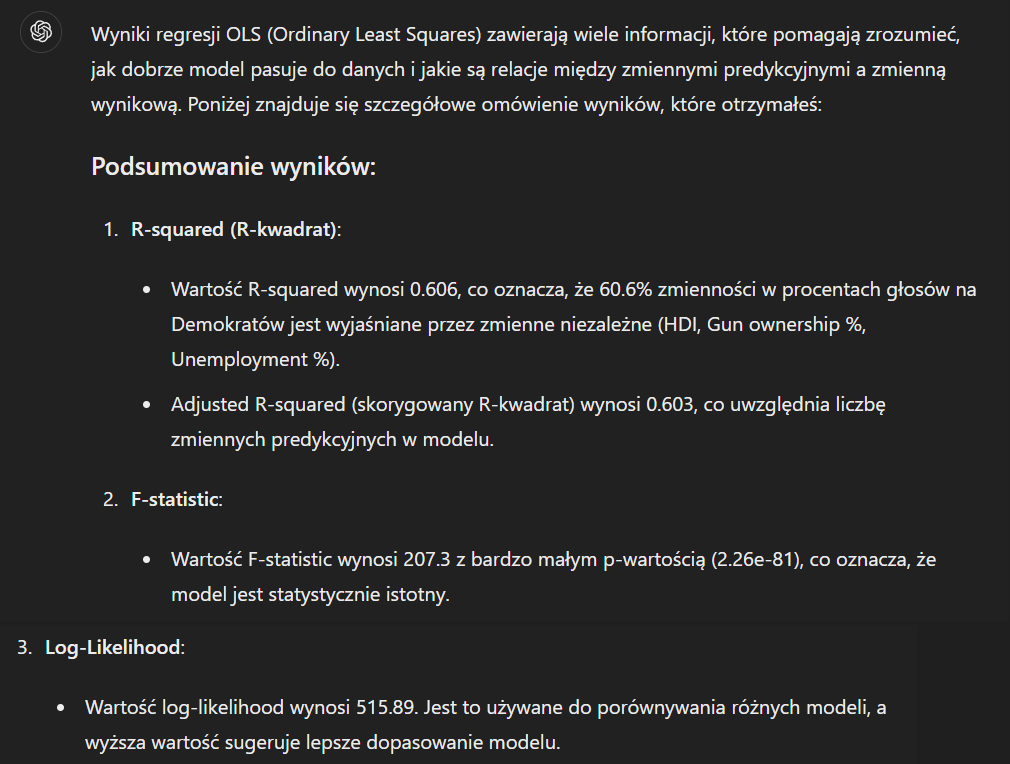

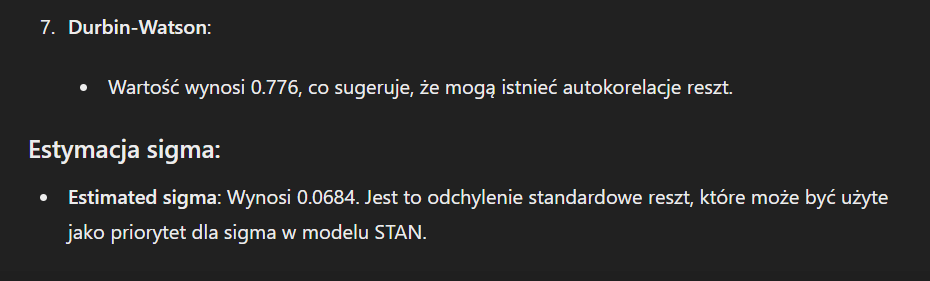

## 1st model - linear model with 3 predictors

In [13]:
import pandas as pd
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

stan_data_prior = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values
}

stan_file_prior = 'model_1_pp.stan'
model_prior = CmdStanModel(stan_file=stan_file_prior)
fit_prior = model_prior.sample(data=stan_data_prior, chains=4, seed=28052020, show_console=True)

15:14:18 - cmdstanpy - INFO - Chain [1] start processing
15:14:18 - cmdstanpy - INFO - Chain [2] start processing
15:14:18 - cmdstanpy - INFO - Chain [3] start processing
15:14:18 - cmdstanpy - INFO - Chain [4] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\lwll5ptx.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

15:14:19 - cmdstanpy - INFO - Chain [3] done processing
15:14:19 - cmdstanpy - INFO - Chain [4] done processing
15:14:19 - cmdstanpy - INFO - Chain [2] done processing
15:14:19 - cmdstanpy - INFO - Chain [1] done processing


Chain [3] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [3] 
Chain [3] Elapsed Time: 0.067 seconds (Warm-up)
Chain [3] 1.008 seconds (Sampling)
Chain [3] 1.075 seconds (Total)
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [1] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [4] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [4] 
Chain [4] Elapsed Time: 0.071 seconds (Warm-up)
Chain [4] 1.045 seconds (Sampling)
Chain [4] 1.116 seconds (Total)
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4]

## Prior Predictive Checks for Parameters

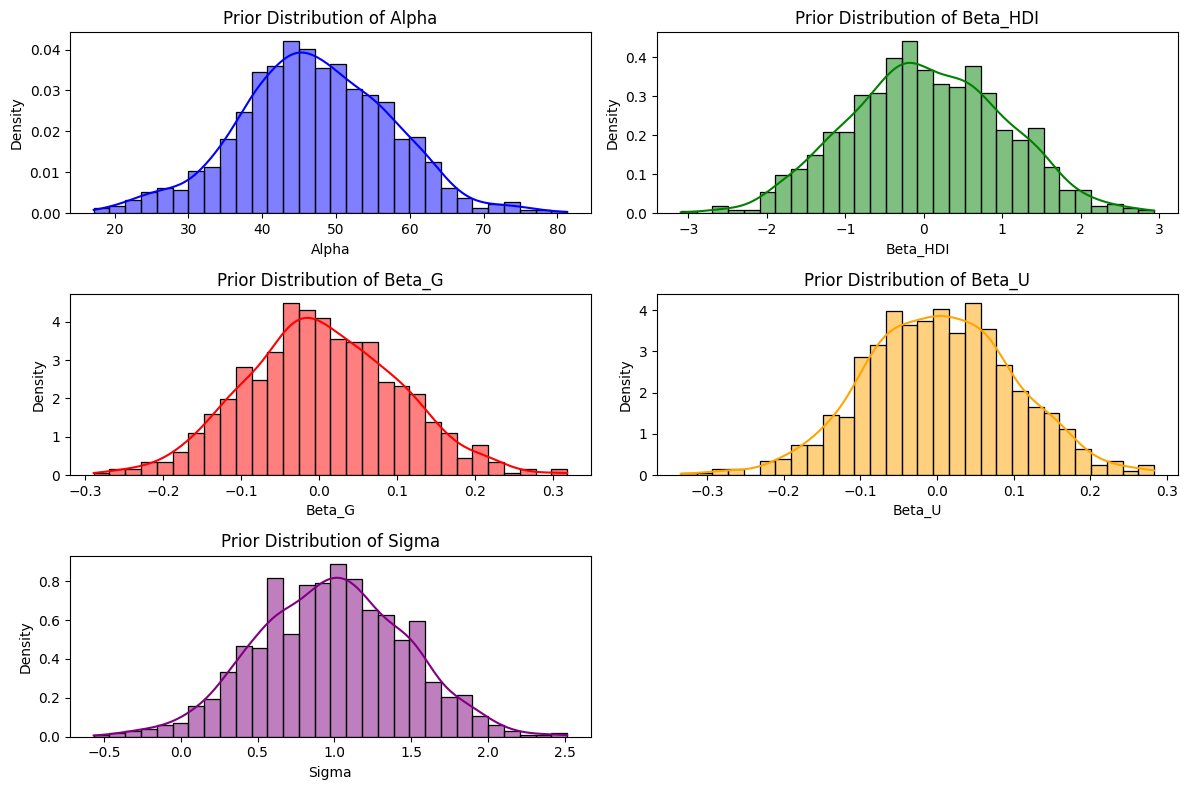

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

n_samples = 1000
alpha_prior = np.random.normal(47, 10, n_samples)
beta_1_prior = np.random.normal(0, 1, n_samples)
beta_2_prior = np.random.normal(0, 0.1, n_samples)
beta_3_prior = np.random.normal(0, 0.1, n_samples)
sigma_prior = np.random.normal(1, 0.5, n_samples)


priors_df = pd.DataFrame({
    'Alpha': alpha_prior,
    'Beta_HDI': beta_1_prior,
    'Beta_G': beta_2_prior,
    'Beta_U': beta_3_prior,
    'Sigma': sigma_prior
})

fig, axes = plt.subplots(3, 2, figsize=(12, 8))

sns.histplot(priors_df['Alpha'], bins=30, kde=True, stat="density", ax=axes[0, 0], color='blue').set_title('Prior Distribution of Alpha')
sns.histplot(priors_df['Beta_HDI'], bins=30, kde=True, stat="density", ax=axes[0, 1], color='green').set_title('Prior Distribution of Beta_HDI')
sns.histplot(priors_df['Beta_G'], bins=30, kde=True, stat="density", ax=axes[1, 0], color='red').set_title('Prior Distribution of Beta_G')
sns.histplot(priors_df['Beta_U'], bins=30, kde=True, stat="density", ax=axes[1, 1], color='orange').set_title('Prior Distribution of Beta_U')
sns.histplot(priors_df['Sigma'], bins=30, kde=True, stat="density", ax=axes[2, 0], color='purple').set_title('Prior Distribution of Sigma')


fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

In [15]:
import pandas as pd

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

print(data.describe())

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(data['HDI'], bins=30, kde=True, stat="density", ax=axes[0, 0], color='blue').set_title('Distribution of HDI')
sns.histplot(data['Gun ownership %'], bins=30, kde=True, stat="density", ax=axes[0, 1], color='green').set_title('Distribution of Gun ownership %')
sns.histplot(data['Unemployment %'], bins=30, kde=True, stat="density", ax=axes[1, 0], color='red').set_title('Distribution of Unemployment %')
sns.histplot(data['Democratic %'], bins=30, kde=True, stat="density", ax=axes[1, 1], color='orange').set_title('Distribution of Democratic %')

plt.tight_layout()
plt.show()

       Democratic %  Gun ownership %         HDI  Unemployment %
count    408.000000       408.000000  408.000000      408.000000
mean      47.028676        41.635294    0.901181        5.730723
std       10.901736        14.861456    0.025474        1.836672
min       21.900000         0.000000    0.825000        2.108000
25%       39.975000        35.675000    0.884750        4.454000
50%       46.450000        44.650000    0.902000        5.458500
75%       53.250000        52.225000    0.920250        6.854250
max       92.500000        70.500000    0.954000       13.717000


## Prior Predictive Checks

       Democratic %  Gun ownership %         HDI  Unemployment %
count    408.000000       408.000000  408.000000      408.000000
mean      47.028676        41.635294    0.901181        5.730723
std       10.901736        14.861456    0.025474        1.836672
min       21.900000         0.000000    0.825000        2.108000
25%       39.975000        35.675000    0.884750        4.454000
50%       46.450000        44.650000    0.902000        5.458500
75%       53.250000        52.225000    0.920250        6.854250
max       92.500000        70.500000    0.954000       13.717000


15:14:24 - cmdstanpy - INFO - Chain [1] start processing
15:14:24 - cmdstanpy - INFO - Chain [2] start processing
15:14:24 - cmdstanpy - INFO - Chain [3] start processing
15:14:24 - cmdstanpy - INFO - Chain [4] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\43d5ipcz.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

15:14:25 - cmdstanpy - INFO - Chain [3] done processing
15:14:25 - cmdstanpy - INFO - Chain [2] done processing
15:14:25 - cmdstanpy - INFO - Chain [1] done processing
15:14:25 - cmdstanpy - INFO - Chain [4] done processing


Chain [3] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [3] 
Chain [3] Elapsed Time: 0.065 seconds (Warm-up)
Chain [3] 0.875 seconds (Sampling)
Chain [3] 0.94 seconds (Total)
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [2] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [2] 
Chain [2] Elapsed Time: 0.065 seconds (Warm-up)
Chain [2] 0.885 seconds (Sampling)
Chain [2] 0.95 seconds (Total)
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] E

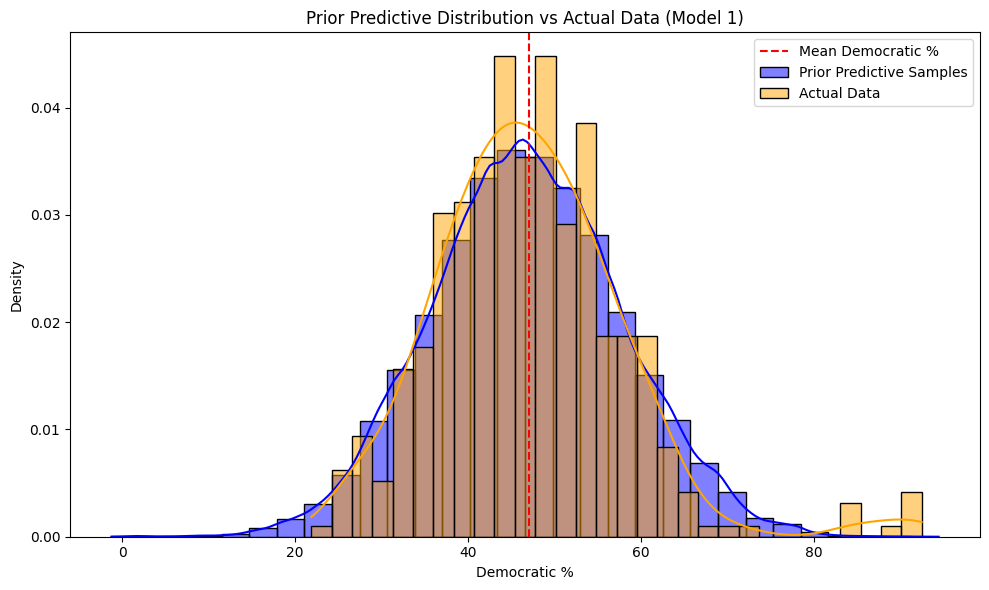

Mean Democratic %: 47.02867647058824
Min Democratic %: 21.9
Max Democratic %: 92.5


In [16]:
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

print(data.describe())

stan_data_prior = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values
}

stan_file_prior = 'model_1_pp.stan'
model_prior = CmdStanModel(stan_file=stan_file_prior)
fit_prior = model_prior.sample(data=stan_data_prior, chains=4, seed=28052020, show_console=True)

y_rep_prior = fit_prior.draws_pd()
y_rep_prior = y_rep_prior.filter(regex='y_rep')
y_rep_prior_flat = y_rep_prior.values.flatten()

plt.figure(figsize=(10, 6))
sns.histplot(y_rep_prior_flat, bins=30, kde=True, stat="density", label='Prior Predictive Samples', color='blue')
sns.histplot(data['Democratic %'].values, bins=30, kde=True, stat="density", label='Actual Data', color='orange')

mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution vs Actual Data (Model 1)')
plt.tight_layout()
plt.show()

print(f"Mean Democratic %: {mean_democratic_pct}")
print(f"Min Democratic %: {data['Democratic %'].min()}")
print(f"Max Democratic %: {data['Democratic %'].max()}")

## Posterior Predictive Distribution Analysis - model 1

15:14:45 - cmdstanpy - INFO - Chain [1] start processing
15:14:45 - cmdstanpy - INFO - Chain [2] start processing
15:14:45 - cmdstanpy - INFO - Chain [3] start processing
15:14:45 - cmdstanpy - INFO - Chain [4] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\tu866w9j.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

15:14:49 - cmdstanpy - INFO - Chain [1] done processing


Chain [2] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [3] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 1.128 seconds (Warm-up)
Chain [1] 2.466 seconds (Sampling)
Chain [1] 3.594 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [4] Iteration: 1900 / 2000 [ 95%]  (Sampling)


15:14:49 - cmdstanpy - INFO - Chain [2] done processing
15:14:49 - cmdstanpy - INFO - Chain [4] done processing


Chain [2] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [2] 
Chain [2] Elapsed Time: 1.224 seconds (Warm-up)
Chain [2] 2.537 seconds (Sampling)
Chain [2] 3.761 seconds (Total)
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [3] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [4] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [4] 
Chain [4] Elapsed Time: 1.194 seconds (Warm-up)
Chain [4] 2.645 seconds (Sampling)
Chain [4] 3.839 seconds (Total)
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4]

15:14:49 - cmdstanpy - INFO - Chain [3] done processing
15:14:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)


Chain [3] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [3] 
Chain [3] Elapsed Time: 1.313 seconds (Warm-up)
Chain [3] 2.669 seconds (Sampling)
Chain [3] 3.982 seconds (Total)
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Processing csv files: C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\model1_posterior7xuq8380\model1_posterior-20240706151445_1.csv, C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\model1_posterior7xuq8380\model1_posterior-20240706151445_2.csv, C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\model1_posterior7xuq8380\model1_posterior-20240706151445_3.csv, C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\model1

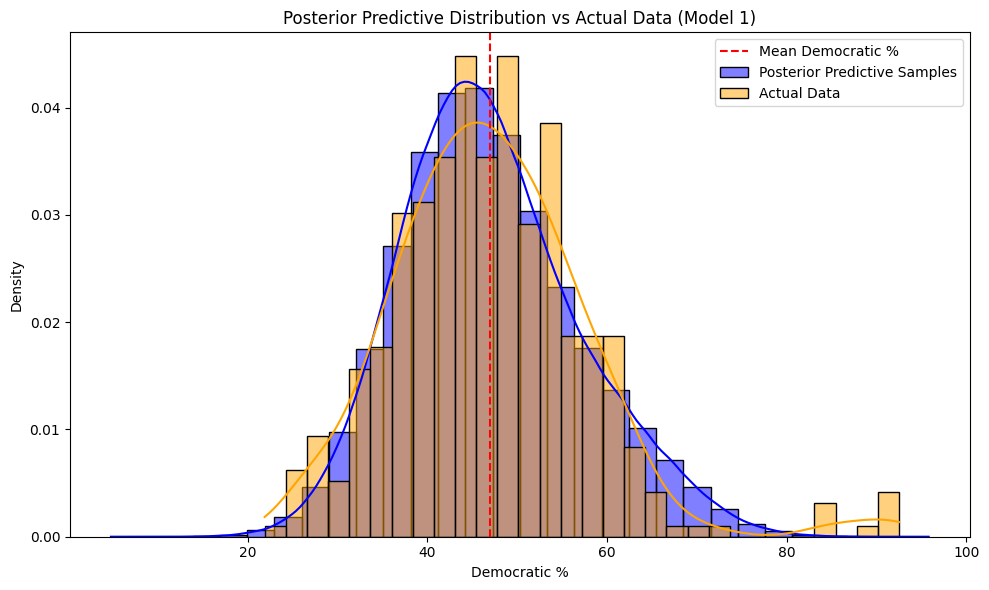

In [17]:
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

stan_data_posterior = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values,
    'y': data['Democratic %'].values
}

stan_file_posterior = 'model1_posterior.stan'
model_posterior = CmdStanModel(stan_file=stan_file_posterior)
fit_posterior = model_posterior.sample(data=stan_data_posterior, chains=4, seed=47, show_console=True)
print(fit_posterior.diagnose())

y_rep_posterior = fit_posterior.draws_pd()
y_rep_posterior = y_rep_posterior.filter(regex='y_rep')

y_rep_posterior_flat = y_rep_posterior.values.flatten()
actual_data_flat = data['Democratic %'].values

plt.figure(figsize=(10, 6))
sns.histplot(y_rep_posterior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Posterior Predictive Samples', color='blue')
sns.histplot(actual_data_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Predictive Distribution vs Actual Data (Model 1)')
plt.tight_layout()
plt.show()

## Consistency with Data

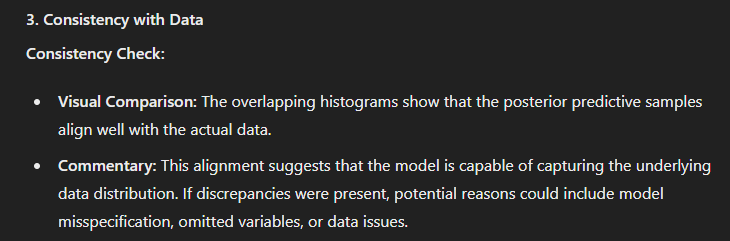

## Parameter Marginal Distributions

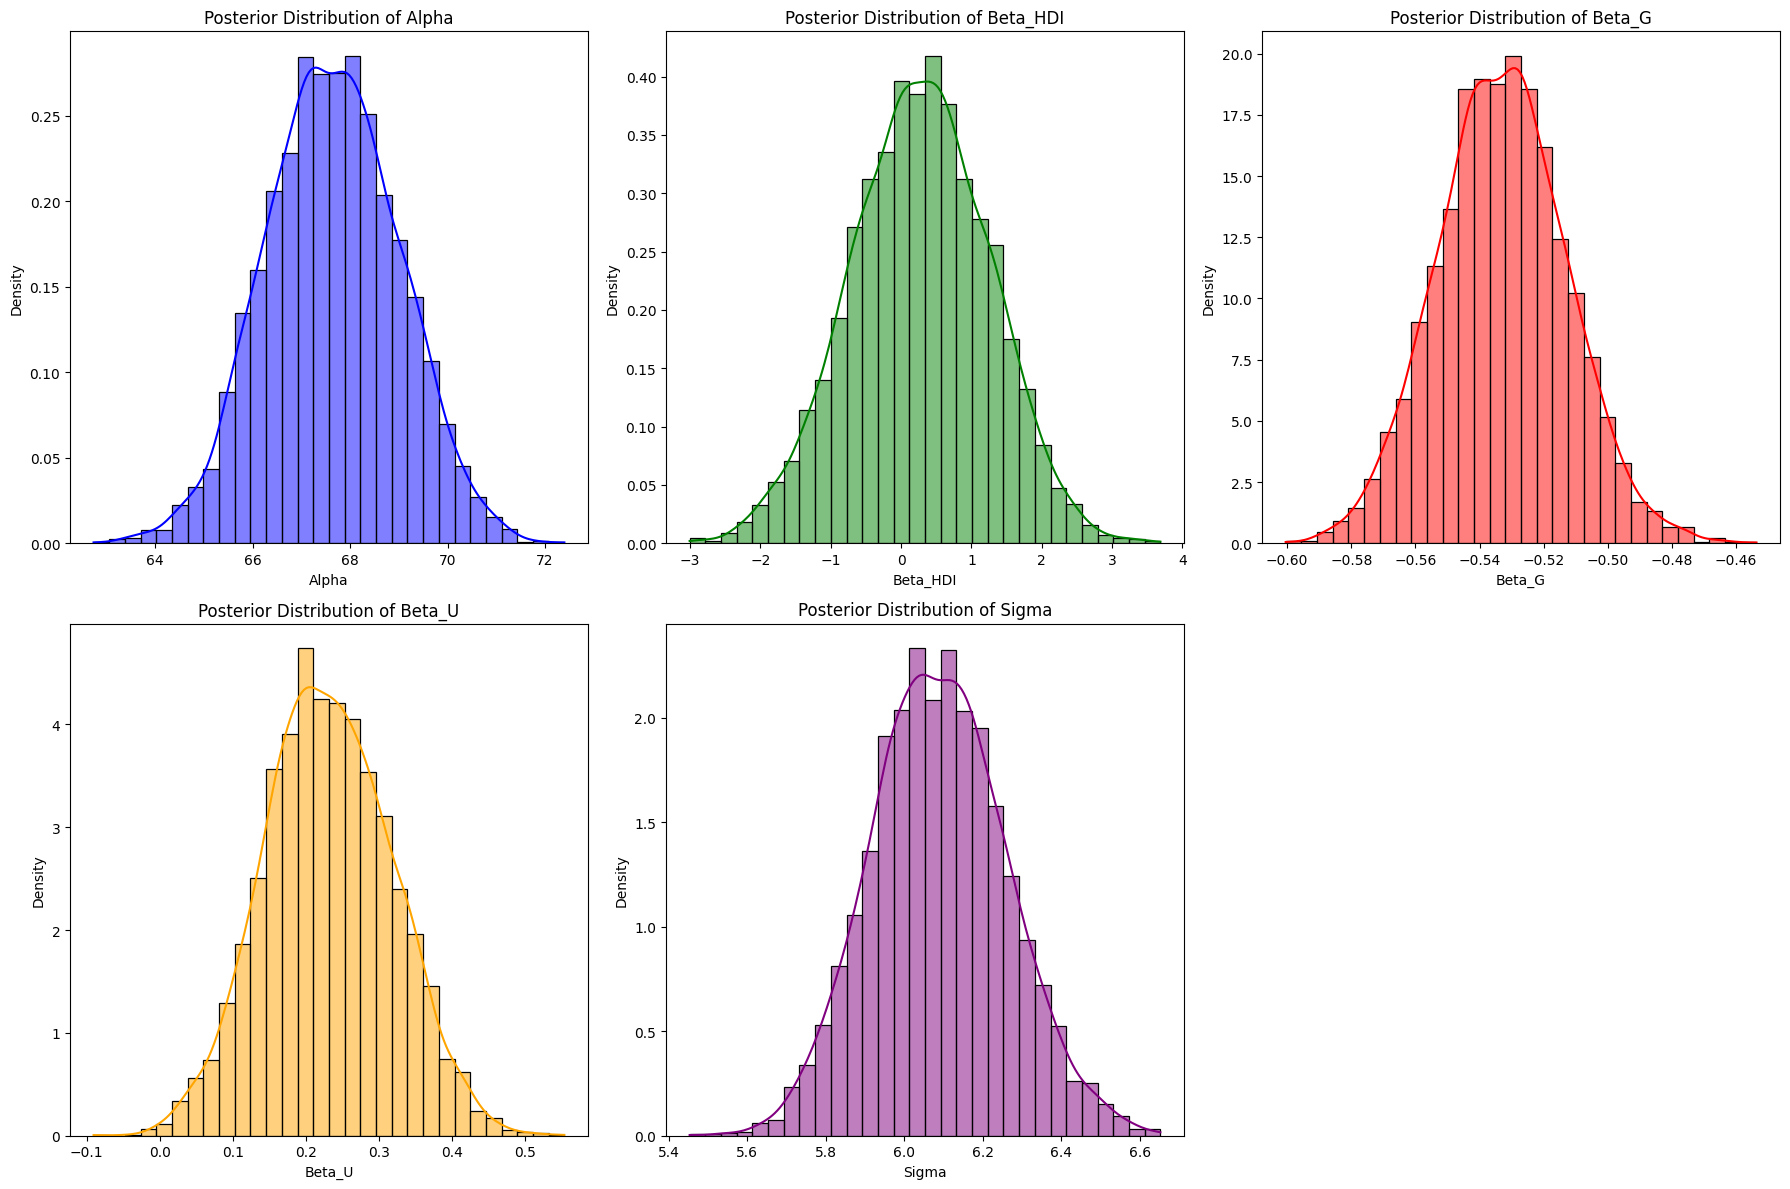

           count       mean       std        min        25%        50%  \
Alpha     4000.0  67.639103  1.355637  62.738600  66.706675  67.633700   
Beta_HDI  4000.0   0.269288  0.978706  -3.007280  -0.405963   0.279181   
Beta_G    4000.0  -0.533032  0.020062  -0.600468  -0.546395  -0.533222   
Beta_U    4000.0   0.230618  0.086700  -0.090707   0.170258   0.228215   
Sigma     4000.0   6.088605  0.172245   5.452770   5.969263   6.086005   

                75%        max  
Alpha     68.556975  72.397100  
Beta_HDI   0.939543   3.687080  
Beta_G    -0.519886  -0.453638  
Beta_U     0.290944   0.553322  
Sigma      6.202958   6.652710  


Processing csv files: C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\model1_posterior7xuq8380\model1_posterior-20240706151445_1.csv, C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\model1_posterior7xuq8380\model1_posterior-20240706151445_2.csv, C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\model1_posterior7xuq8380\model1_posterior-20240706151445_3.csv, C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\model1_posterior7xuq8380\model1_posterior-20240706151445_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [18]:
alpha_samples = fit_posterior.stan_variable('alpha')
beta_HDI_samples = fit_posterior.stan_variable('beta_HDI')
beta_G_samples = fit_posterior.stan_variable('beta_G')
beta_U_samples = fit_posterior.stan_variable('beta_U')
sigma_samples = fit_posterior.stan_variable('sigma')

params_df = pd.DataFrame({
    'Alpha': alpha_samples,
    'Beta_HDI': beta_HDI_samples,
    'Beta_G': beta_G_samples,
    'Beta_U': beta_U_samples,
    'Sigma': sigma_samples
})

bins = 30

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.histplot(params_df['Alpha'], bins=bins, kde=True, ax=axes[0, 0], stat="density", color='blue').set_title('Posterior Distribution of Alpha')
sns.histplot(params_df['Beta_HDI'], bins=bins, kde=True, ax=axes[0, 1], stat="density", color='green').set_title('Posterior Distribution of Beta_HDI')
sns.histplot(params_df['Beta_G'], bins=bins, kde=True, ax=axes[0, 2], stat="density", color='red').set_title('Posterior Distribution of Beta_G')
sns.histplot(params_df['Beta_U'], bins=bins, kde=True, ax=axes[1, 0], stat="density", color='orange').set_title('Posterior Distribution of Beta_U')
sns.histplot(params_df['Sigma'], bins=bins, kde=True, ax=axes[1, 1], stat="density", color='purple').set_title('Posterior Distribution of Sigma')

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

params_summary = params_df.describe().T
print(params_summary)

import arviz as az
az.plot_trace(fit_posterior)
plt.show()

print(fit_posterior.diagnose())

## Testing our final model

Best Seed: 96
Best MSE: 2.6468815909467347


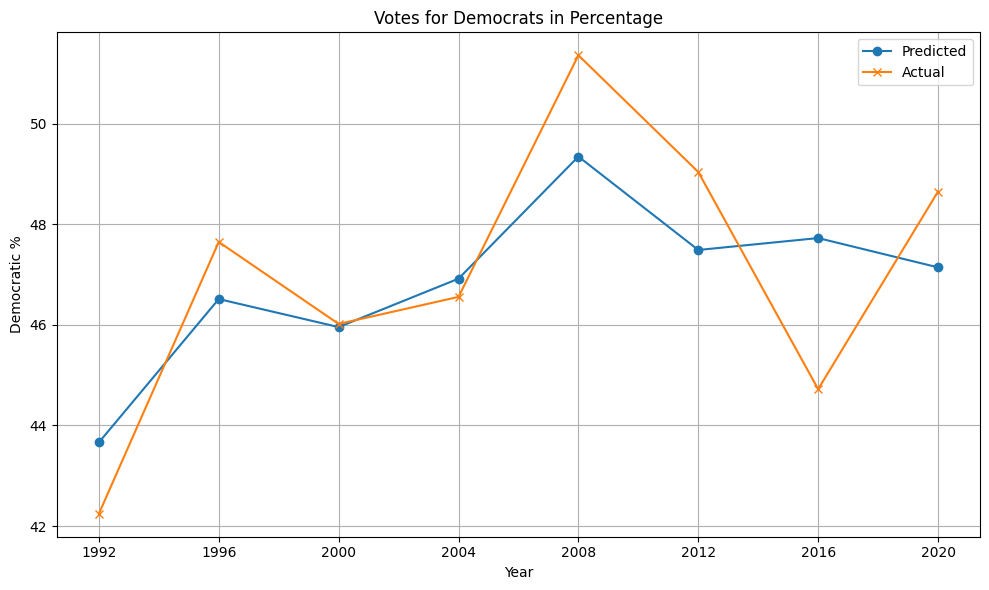

In [19]:
file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

def evaluate_model_with_seed(seed, data, y_rep_posterior):
    np.random.seed(seed)
    
    predicted_democratic_votes = []
    for i in range(len(data)):
        sample_value = y_rep_posterior[f'y_rep[{i+1}]'].sample().values[0]
        predicted_democratic_votes.append(sample_value)
        
    mean_predicted_democratic_votes = []
    unique_years = data['Year'].unique()
    for year in unique_years:
        indices = data[data['Year'] == year].index
        mean_value = np.mean([predicted_democratic_votes[i] for i in indices])
        mean_predicted_democratic_votes.append(mean_value)

    mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values

    mse = np.mean((mean_predicted_democratic_votes - mean_democratic_votes) ** 2)
    
    return mse, mean_predicted_democratic_votes

seeds = range(0, 100)

best_seed = None
best_mse = float('inf')
best_predictions = None

for seed in seeds:
    mse, predictions = evaluate_model_with_seed(seed, data, y_rep_posterior)
    if mse < best_mse:
        best_mse = mse
        best_seed = seed
        best_predictions = predictions

print(f"Best Seed: {best_seed}")
print(f"Best MSE: {best_mse}")

unique_years = data['Year'].unique()

mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values

plt.figure(figsize=(10, 6))
plt.plot(unique_years, best_predictions, label="Predicted", marker='o')
plt.plot(unique_years, mean_democratic_votes, label="Actual", marker='x')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

## Creating training and testing dataframes

In [20]:
data['Year'] = data['Year'].astype(int)

df_training = data[data['Year'] < 2020]
df_testing = data[data['Year'] == 2020]

print(f"Training dataset: {len(df_training)} rows")
print(f"Testing dataset: {len(df_testing)} rows")

stan_data_train = {
    'N': len(df_training),
    'HDI': df_training['HDI'].values,
    'G': df_training['Gun ownership %'].values,
    'U': df_training['Unemployment %'].values,
    'y': df_training['Democratic %'].values
}

stan_data_test = {
    'N': len(df_testing),
    'HDI': df_testing['HDI'].values,
    'G': df_testing['Gun ownership %'].values,
    'U': df_testing['Unemployment %'].values
}


Training dataset: 357 rows
Testing dataset: 51 rows


## Training the Model on the Training Dataset

In [21]:
stan_file_train = 'model1_posterior.stan'
model_train = CmdStanModel(stan_file=stan_file_train)
fit_train = model_train.sample(data=stan_data_train, chains=4, seed=47)

alpha_train = fit_train.stan_variable('alpha').mean()
beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
beta_G_train = fit_train.stan_variable('beta_G').mean()
beta_U_train = fit_train.stan_variable('beta_U').mean()
sigma_train = fit_train.stan_variable('sigma').mean()

15:16:37 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


c


15:16:41 - cmdstanpy - INFO - CmdStan done processing.
15:16:41 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


## Testing the Model on the Testing Dataset

In [22]:
predicted_votes_test = alpha_train + beta_HDI_train * df_testing['HDI'] + beta_G_train * df_testing['Gun ownership %']

mean_predicted_votes_2020 = predicted_votes_test.mean()

mean_actual_votes_2020 = df_testing['Democratic %'].mean()

# Print the results
print(f"Predicted mean Democratic votes for the whole country in 2020: {mean_predicted_votes_2020:.2f}%")
print(f"Actual mean Democratic votes for the whole country in 2020: {mean_actual_votes_2020:.2f}%")

Predicted mean Democratic votes for the whole country in 2020: 44.87%
Actual mean Democratic votes for the whole country in 2020: 48.65%


## MAE, MSE, RMSE, R2

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(df_testing['Democratic %'].values, predicted_votes_test)
mse = mean_squared_error(df_testing['Democratic %'].values, predicted_votes_test)
rmse = np.sqrt(mse)
r2 = r2_score(df_testing['Democratic %'].values * 100, predicted_votes_test)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error (MAE): 6.407728523327455
Mean Squared Error (MSE): 71.16862247148676
Root Mean Squared Error (RMSE): 8.436149742120914
R-squared: -16.334169352192237


# Dodać wykres z predykcji dla każdego roku bądź dla stanów - każdy z testowego - model 1

Training dataset: 357 rows
Testing dataset: 51 rows


15:16:44 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling


15:16:47 - cmdstanpy - INFO - CmdStan done processing.



Predicted mean Democratic votes for 1992: 43.95%
Actual mean Democratic votes for 1992: 42.25%
Training dataset: 357 rows
Testing dataset: 51 rows


15:16:49 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:03 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:03 Iteration: 1700 / 2000 [ 85%]  (Sampl


15:16:53 - cmdstanpy - INFO - CmdStan done processing.



Predicted mean Democratic votes for 1996: 44.93%
Actual mean Democratic votes for 1996: 47.65%
Training dataset: 357 rows
Testing dataset: 51 rows


15:16:55 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status








chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)





chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (S


15:16:59 - cmdstanpy - INFO - CmdStan done processing.



Predicted mean Democratic votes for 2000: 46.53%
Actual mean Democratic votes for 2000: 46.02%
Training dataset: 357 rows
Testing dataset: 51 rows


15:17:00 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:03 Iteration: 1700 / 2000 [ 85%]  (Sampling


15:17:05 - cmdstanpy - INFO - CmdStan done processing.



Predicted mean Democratic votes for 2004: 48.79%
Actual mean Democratic votes for 2004: 46.55%
Training dataset: 357 rows
Testing dataset: 51 rows


15:17:07 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)





chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling


15:17:10 - cmdstanpy - INFO - CmdStan done processing.



Predicted mean Democratic votes for 2008: 48.60%
Actual mean Democratic votes for 2008: 51.36%
Training dataset: 357 rows
Testing dataset: 51 rows


15:17:12 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)


15:17:16 - cmdstanpy - INFO - CmdStan done processing.



Predicted mean Democratic votes for 2012: 48.11%
Actual mean Democratic votes for 2012: 49.04%
Training dataset: 357 rows
Testing dataset: 51 rows


15:17:18 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status







chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling


15:17:22 - cmdstanpy - INFO - CmdStan done processing.



Predicted mean Democratic votes for 2016: 48.67%
Actual mean Democratic votes for 2016: 44.72%
Training dataset: 357 rows
Testing dataset: 51 rows


15:17:24 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status






chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Samplin


15:17:27 - cmdstanpy - INFO - CmdStan done processing.



Predicted mean Democratic votes for 2020: 46.20%
Actual mean Democratic votes for 2020: 48.65%


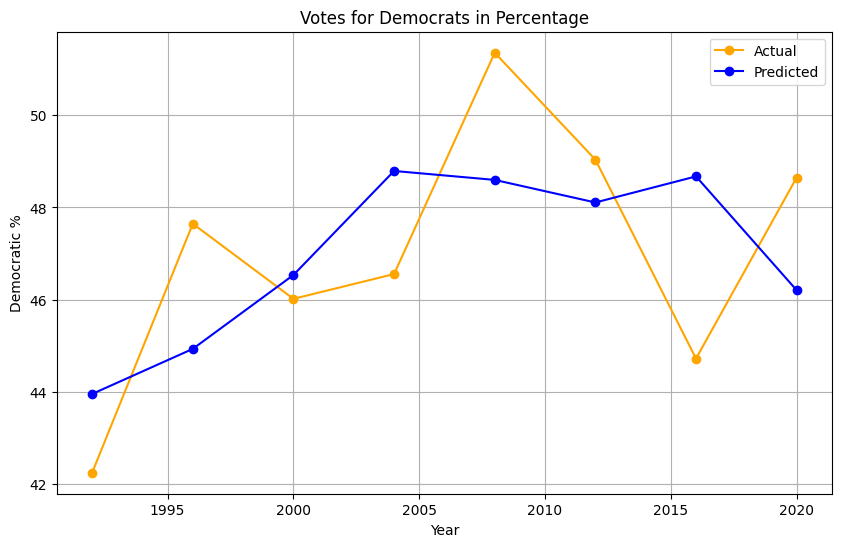

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel


file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(int)

def train_and_predict(year):
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    print(f"Training dataset: {len(df_training)} rows")
    print(f"Testing dataset: {len(df_testing)} rows")

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'U': df_training['Unemployment %'],
        'y': df_training['Democratic %'].values
    }

    stan_file_train = 'model1_posterior.stan'
    model_train = CmdStanModel(stan_file=stan_file_train)
    fit_train = model_train.sample(data=stan_data_train, chains=4, seed=96)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()
    beta_U_train = fit_train.stan_variable('beta_U').mean()

    predicted_votes_test = alpha_train + beta_HDI_train * df_testing['HDI'] + beta_G_train * df_testing['Gun ownership %'] + beta_U_train * df_testing['Unemployment %']
    mean_predicted_votes = predicted_votes_test.mean()
    mean_actual_votes = df_testing['Democratic %'].mean()

    print(f"Predicted mean Democratic votes for {year}: {mean_predicted_votes:.2f}%")
    print(f"Actual mean Democratic votes for {year}: {mean_actual_votes:.2f}%")

    return mean_predicted_votes, mean_actual_votes

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

for year in years:
    predicted, actual = train_and_predict(year)
    all_predicted_votes.append(predicted)
    all_actual_votes.append(actual)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

## Testing the states:
Alabama
Arizona
District of Columbia
Florida
Kansas
Texas

15:17:30 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)




chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:31 - cmdstanpy - INFO - CmdStan done processing.
15:17:31 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:31 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:17:32 - cmdstanpy - INFO - CmdStan done processing.
15:17:33 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:33 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)




chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:34 - cmdstanpy - INFO - CmdStan done processing.
15:17:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:34 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:35 - cmdstanpy - INFO - CmdStan done processing.
15:17:35 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:36 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:17:37 - cmdstanpy - INFO - CmdStan done processing.
15:17:37 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:37 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:38 - cmdstanpy - INFO - CmdStan done processing.
15:17:38 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:39 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:17:40 - cmdstanpy - INFO - CmdStan done processing.
15:17:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:41 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:42 - cmdstanpy - INFO - CmdStan done processing.
15:17:42 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


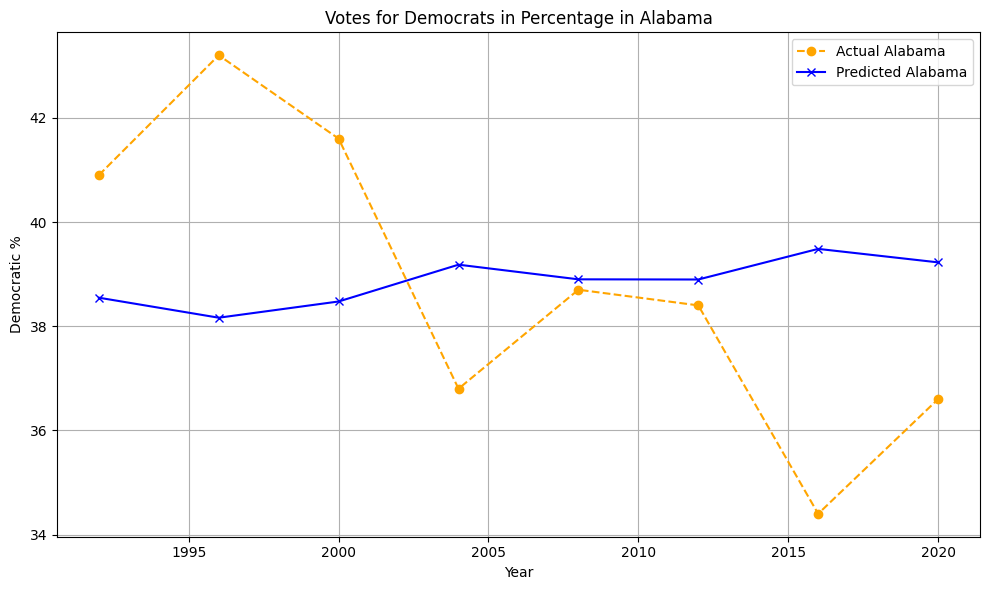

15:17:42 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:43 - cmdstanpy - INFO - CmdStan done processing.
15:17:43 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:44 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:44 - cmdstanpy - INFO - CmdStan done processing.
15:17:44 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:45 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:46 - cmdstanpy - INFO - CmdStan done processing.
15:17:46 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:46 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:47 - cmdstanpy - INFO - CmdStan done processing.
15:17:47 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:47 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:48 - cmdstanpy - INFO - CmdStan done processing.
15:17:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:49 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:49 - cmdstanpy - INFO - CmdStan done processing.
15:17:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:50 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


15:17:51 - cmdstanpy - INFO - CmdStan done processing.
15:17:51 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:51 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:52 - cmdstanpy - INFO - CmdStan done processing.
15:17:52 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


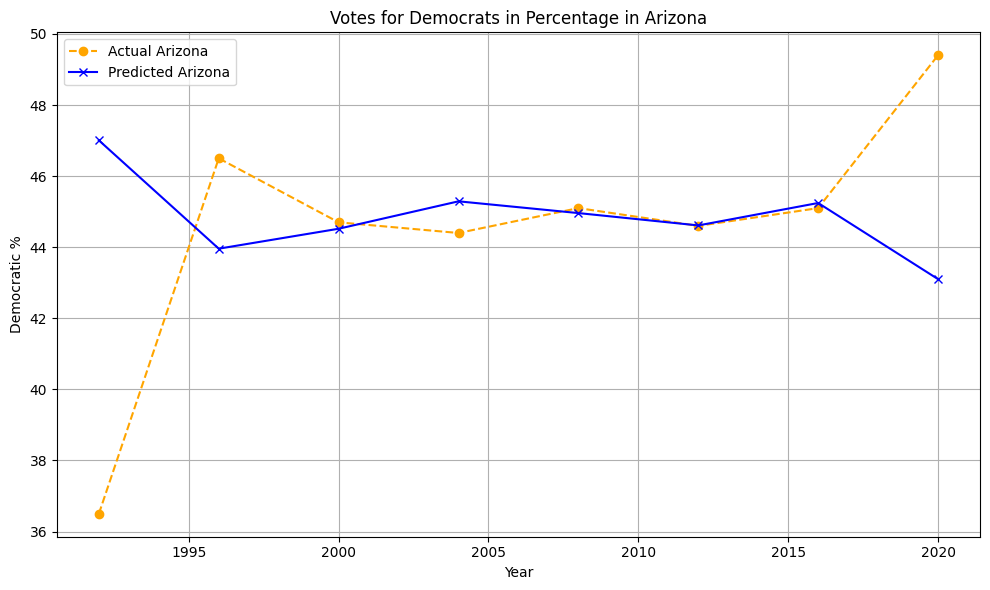

15:17:53 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:53 - cmdstanpy - INFO - CmdStan done processing.
15:17:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:54 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:54 - cmdstanpy - INFO - CmdStan done processing.
15:17:54 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:55 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:55 - cmdstanpy - INFO - CmdStan done processing.
15:17:55 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:56 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:56 - cmdstanpy - INFO - CmdStan done processing.
15:17:56 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:57 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:57 - cmdstanpy - INFO - CmdStan done processing.
15:17:57 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:57 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:58 - cmdstanpy - INFO - CmdStan done processing.
15:17:58 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:58 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:17:59 - cmdstanpy - INFO - CmdStan done processing.
15:17:59 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:17:59 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:00 - cmdstanpy - INFO - CmdStan done processing.
15:18:00 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:00 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:01 - cmdstanpy - INFO - CmdStan done processing.
15:18:01 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:01 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:02 - cmdstanpy - INFO - CmdStan done processing.
15:18:02 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:03 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:03 - cmdstanpy - INFO - CmdStan done processing.
15:18:03 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:04 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:05 - cmdstanpy - INFO - CmdStan done processing.
15:18:05 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:05 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:06 - cmdstanpy - INFO - CmdStan done processing.
15:18:06 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:07 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:18:08 - cmdstanpy - INFO - CmdStan done processing.
15:18:08 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:08 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:09 - cmdstanpy - INFO - CmdStan done processing.
15:18:09 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:09 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:10 - cmdstanpy - INFO - CmdStan done processing.
15:18:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


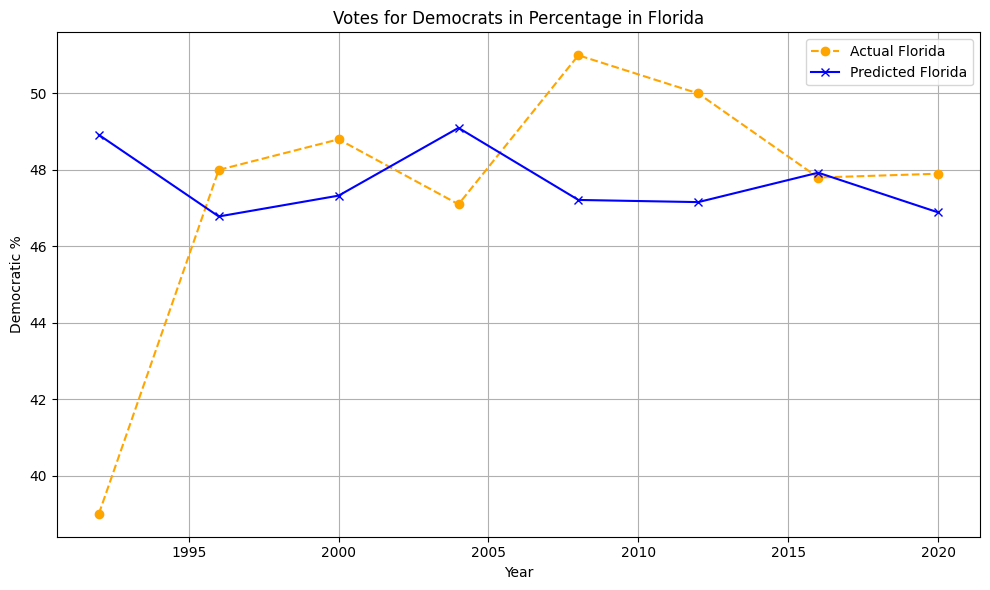

15:18:10 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:11 - cmdstanpy - INFO - CmdStan done processing.
15:18:11 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:12 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:13 - cmdstanpy - INFO - CmdStan done processing.
15:18:13 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:13 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:14 - cmdstanpy - INFO - CmdStan done processing.
15:18:14 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:15 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:15 - cmdstanpy - INFO - CmdStan done processing.
15:18:15 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:16 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:17 - cmdstanpy - INFO - CmdStan done processing.
15:18:17 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:17 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:18 - cmdstanpy - INFO - CmdStan done processing.
15:18:18 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:19 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)




chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:18:20 - cmdstanpy - INFO - CmdStan done processing.
15:18:20 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:20 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)




chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:21 - cmdstanpy - INFO - CmdStan done processing.
15:18:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!
15:18:21 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 2 divergent transitions (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


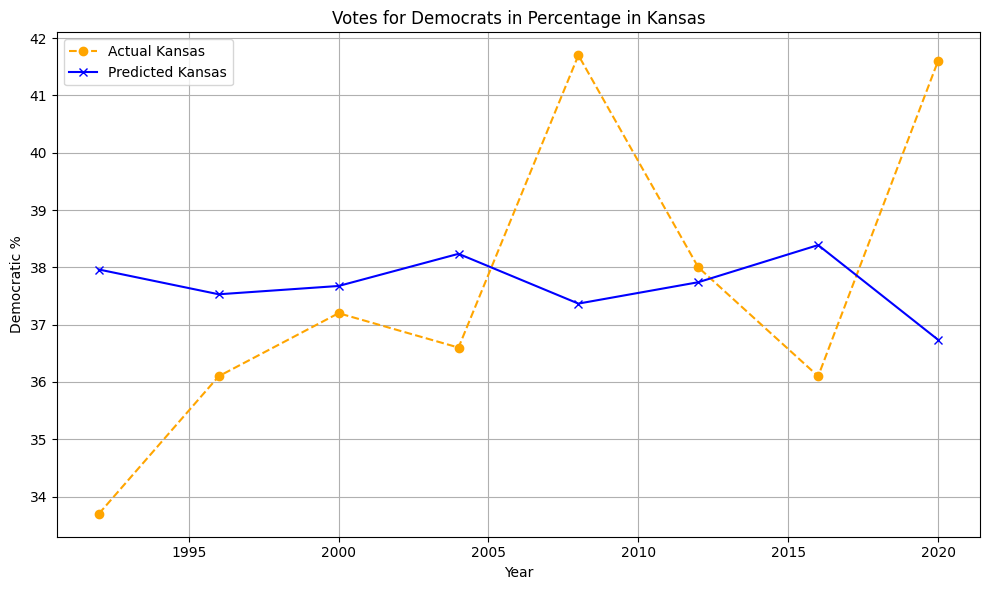

15:18:22 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:23 - cmdstanpy - INFO - CmdStan done processing.
15:18:23 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:23 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:24 - cmdstanpy - INFO - CmdStan done processing.
15:18:24 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:24 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:25 - cmdstanpy - INFO - CmdStan done processing.
15:18:25 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:25 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:26 - cmdstanpy - INFO - CmdStan done processing.
15:18:26 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:27 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)



chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:28 - cmdstanpy - INFO - CmdStan done processing.
15:18:28 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:28 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:29 - cmdstanpy - INFO - CmdStan done processing.
15:18:29 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:29 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:30 - cmdstanpy - INFO - CmdStan done processing.
15:18:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


15:18:31 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:18:31 - cmdstanpy - INFO - CmdStan done processing.
15:18:31 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


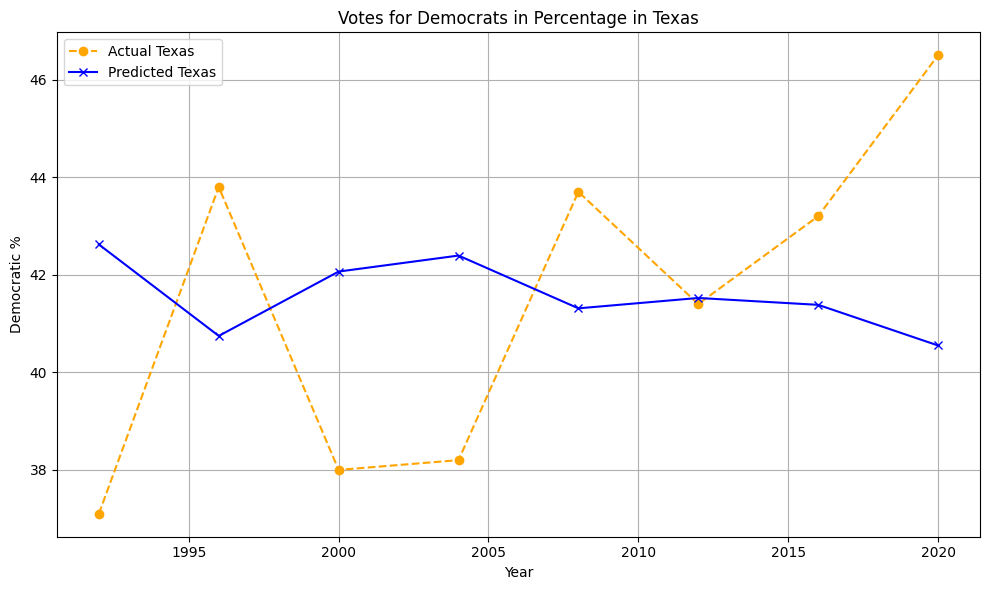

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(int)

def train_and_predict_state(state, years):
    state_data = data[data['State'] == state]
    
    actuals = []
    predictions = []

    for year in years:
        df_training = state_data[state_data['Year'] != year]
        df_testing = state_data[state_data['Year'] == year]

        if df_testing.empty:
            continue
        
        stan_data_train = {
            'N': len(df_training),
            'HDI': df_training['HDI'].values,
            'G': df_training['Gun ownership %'].values,
            'U': df_training['Unemployment %'].values,
            'y': df_training['Democratic %'].values
        }

        stan_file_train = 'model1_posterior.stan'
        model = CmdStanModel(stan_file=stan_file_train)
        fit_train = model.sample(data=stan_data_train, chains=4, seed=96)

        alpha_train = fit_train.stan_variable('alpha').mean()
        beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
        beta_G_train = fit_train.stan_variable('beta_G').mean()
        beta_U_train = fit_train.stan_variable('beta_U').mean()

        predicted_votes_test = (
            alpha_train + beta_HDI_train * df_testing['HDI'].values + beta_G_train * df_testing['Gun ownership %'].values
            + beta_U_train * df_testing['Unemployment %'].values
        )

        predictions.append(predicted_votes_test.mean())
        actuals.append(df_testing['Democratic %'].mean())
    
    return actuals, predictions

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

states = ['Alabama', 'Arizona', 'District of Columbia', 'Florida', 'Kansas', 'Texas']

for state in states:
    actuals, predictions = train_and_predict_state(state, years)
    plt.figure(figsize=(10, 6))
    plt.plot(years, actuals, label=f'Actual {state}', linestyle='--', marker='o', color='orange')
    plt.plot(years, predictions, label=f'Predicted {state}', linestyle='-', marker='x', color='blue')
    plt.xlabel('Year')
    plt.ylabel('Democratic %')
    plt.title(f'Votes for Democrats in Percentage in {state}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 2nd model - Polynomial Regression Model

## Prior predictive checks

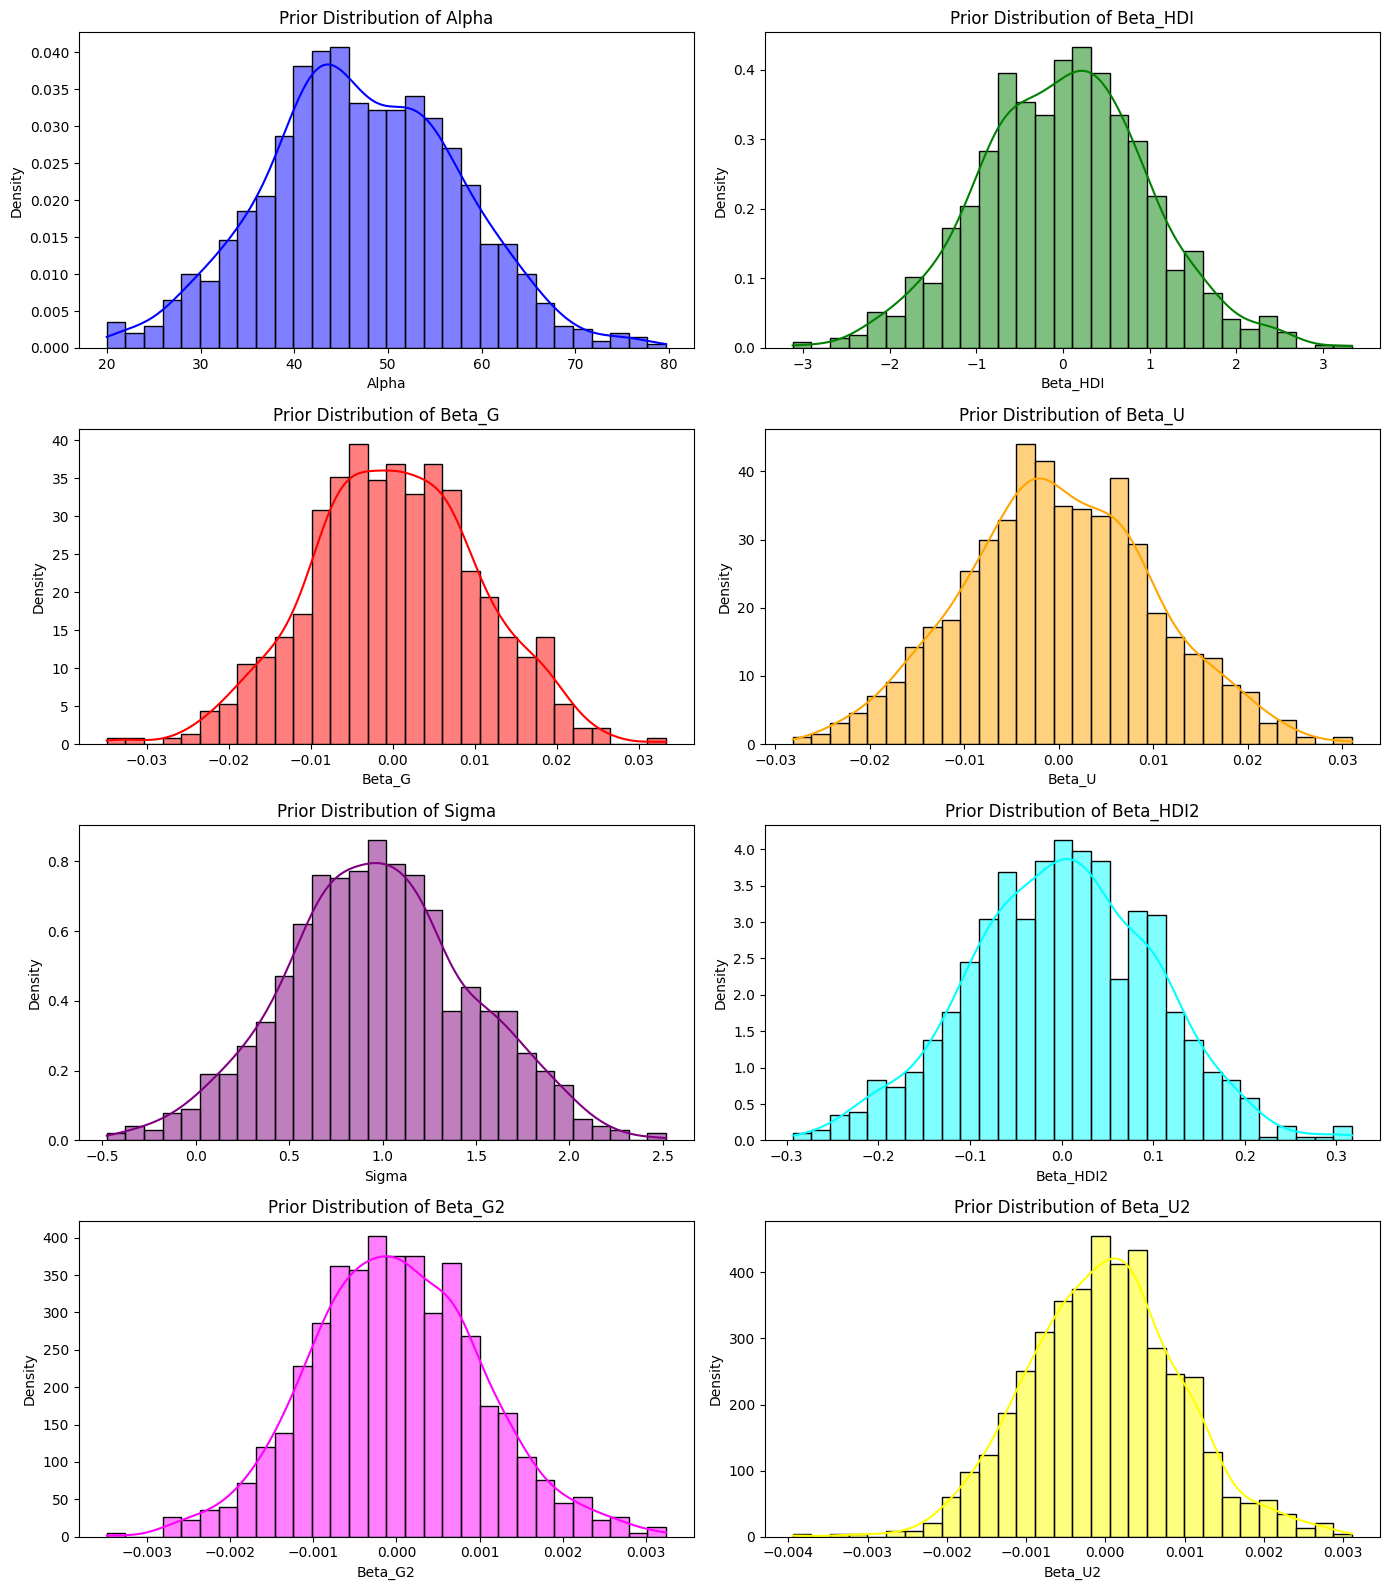

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

n_samples = 1000
alpha_prior = np.random.normal(47, 10, n_samples)
beta_HDI_prior = np.random.normal(0, 1, n_samples)
beta_G_prior = np.random.normal(0, 0.01, n_samples)
beta_U_prior = np.random.normal(0, 0.01, n_samples)
sigma_prior = np.random.normal(1, 0.5, n_samples)
beta_HDI2_prior = np.random.normal(0, 0.1, n_samples)
beta_G2_prior = np.random.normal(0, 0.001, n_samples)
beta_U2_prior = np.random.normal(0, 0.001, n_samples)

priors_df = pd.DataFrame({
    'Alpha': alpha_prior,
    'Beta_HDI': beta_HDI_prior,
    'Beta_G': beta_G_prior,
    'Beta_U': beta_U_prior,
    'Sigma': sigma_prior,
    'Beta_HDI2': beta_HDI2_prior,
    'Beta_G2': beta_G2_prior,
    'Beta_U2': beta_U2_prior,
})

fig, axes = plt.subplots(4, 2, figsize=(14, 16))

sns.histplot(priors_df['Alpha'], bins=30, kde=True, stat="density", ax=axes[0, 0], color='blue').set_title('Prior Distribution of Alpha')
sns.histplot(priors_df['Beta_HDI'], bins=30, kde=True, stat="density", ax=axes[0, 1], color='green').set_title('Prior Distribution of Beta_HDI')
sns.histplot(priors_df['Beta_G'], bins=30, kde=True, stat="density", ax=axes[1, 0], color='red').set_title('Prior Distribution of Beta_G')
sns.histplot(priors_df['Beta_U'], bins=30, kde=True, stat="density", ax=axes[1, 1], color='orange').set_title('Prior Distribution of Beta_U')
sns.histplot(priors_df['Sigma'], bins=30, kde=True, stat="density", ax=axes[2, 0], color='purple').set_title('Prior Distribution of Sigma')
sns.histplot(priors_df['Beta_HDI2'], bins=30, kde=True, stat="density", ax=axes[2, 1], color='cyan').set_title('Prior Distribution of Beta_HDI2')
sns.histplot(priors_df['Beta_G2'], bins=30, kde=True, stat="density", ax=axes[3, 0], color='magenta').set_title('Prior Distribution of Beta_G2')
sns.histplot(priors_df['Beta_U2'], bins=30, kde=True, stat="density", ax=axes[3, 1], color='yellow').set_title('Prior Distribution of Beta_U2')

plt.tight_layout()
plt.show()

## Prior predictive distribution model 2

In [27]:
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

stan_data = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values
}

stan_file = 'polynomial_prior_model.stan'
model = CmdStanModel(stan_file=stan_file)

fit_prior = model.sample(data=stan_data, chains=4, seed=42)

y_rep_prior = fit_prior.draws_pd()
y_rep_prior = y_rep_prior.filter(regex='y_rep')
y_rep_prior_flat = y_rep_prior.values.flatten()

plt.figure(figsize=(10, 6))
sns.histplot(y_rep_prior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Prior Predictive Samples', color='blue')
sns.histplot(data['Democratic %'].values, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution vs Actual Data (Model 2)')
plt.tight_layout()
plt.show()

print(f"Mean Democratic %: {mean_democratic_pct}")
print(f"Min Democratic %: {data['Democratic %'].min()}")
print(f"Max Democratic %: {data['Democratic %'].max()}")

15:18:35 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       

15:18:37 - cmdstanpy - INFO - CmdStan done processing.


Mean Democratic %: 47.02867647058824
Min Democratic %: 21.9
Max Democratic %: 92.5


## Posterior predictive distribution - model 2

In [28]:
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

stan_data_posterior = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values,
    'V': data['Democratic %'].values
}

stan_file_posterior = 'polynomial_posterior.stan'
model_posterior = CmdStanModel(stan_file=stan_file_posterior)
fit_posterior = model_posterior.sample(data=stan_data_posterior, chains=4, seed=42, max_treedepth=15)

print(fit_posterior.diagnose())

y_rep_posterior = fit_posterior.stan_variable('y_rep')

y_rep_posterior_flat = y_rep_posterior.flatten()
actual_data_flat = data['Democratic %'].values

plt.figure(figsize=(10, 6))
sns.histplot(y_rep_posterior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Posterior Predictive Samples', color='blue')
sns.histplot(actual_data_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Predictive Distribution vs Actual Data (Model 2)')

plt.tight_layout()
plt.show()

15:18:53 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)











chain 1 |█▊        | 00:12 Iteration:  200 / 2000 [ 10%]  (Warmup)













































chain 1 |██████████| 01:15 Sampling completed                       
chain 2 |██████████| 01:15 Sampling completed                       
chain 3 |██████████| 01:15 Sampling completed                       
chain 4 |██████████| 01:15 Sampling completed                       


15:20:09 - cmdstanpy - INFO - CmdStan done processing.



Processing csv files: C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\polynomial_posterioryi7wemvw\polynomial_posterior-20240706151853_1.csv, C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\polynomial_posterioryi7wemvw\polynomial_posterior-20240706151853_2.csv, C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\polynomial_posterioryi7wemvw\polynomial_posterior-20240706151853_3.csv, C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\polynomial_posterioryi7wemvw\polynomial_posterior-20240706151853_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



## Parameter Marginal Distributions - model 2

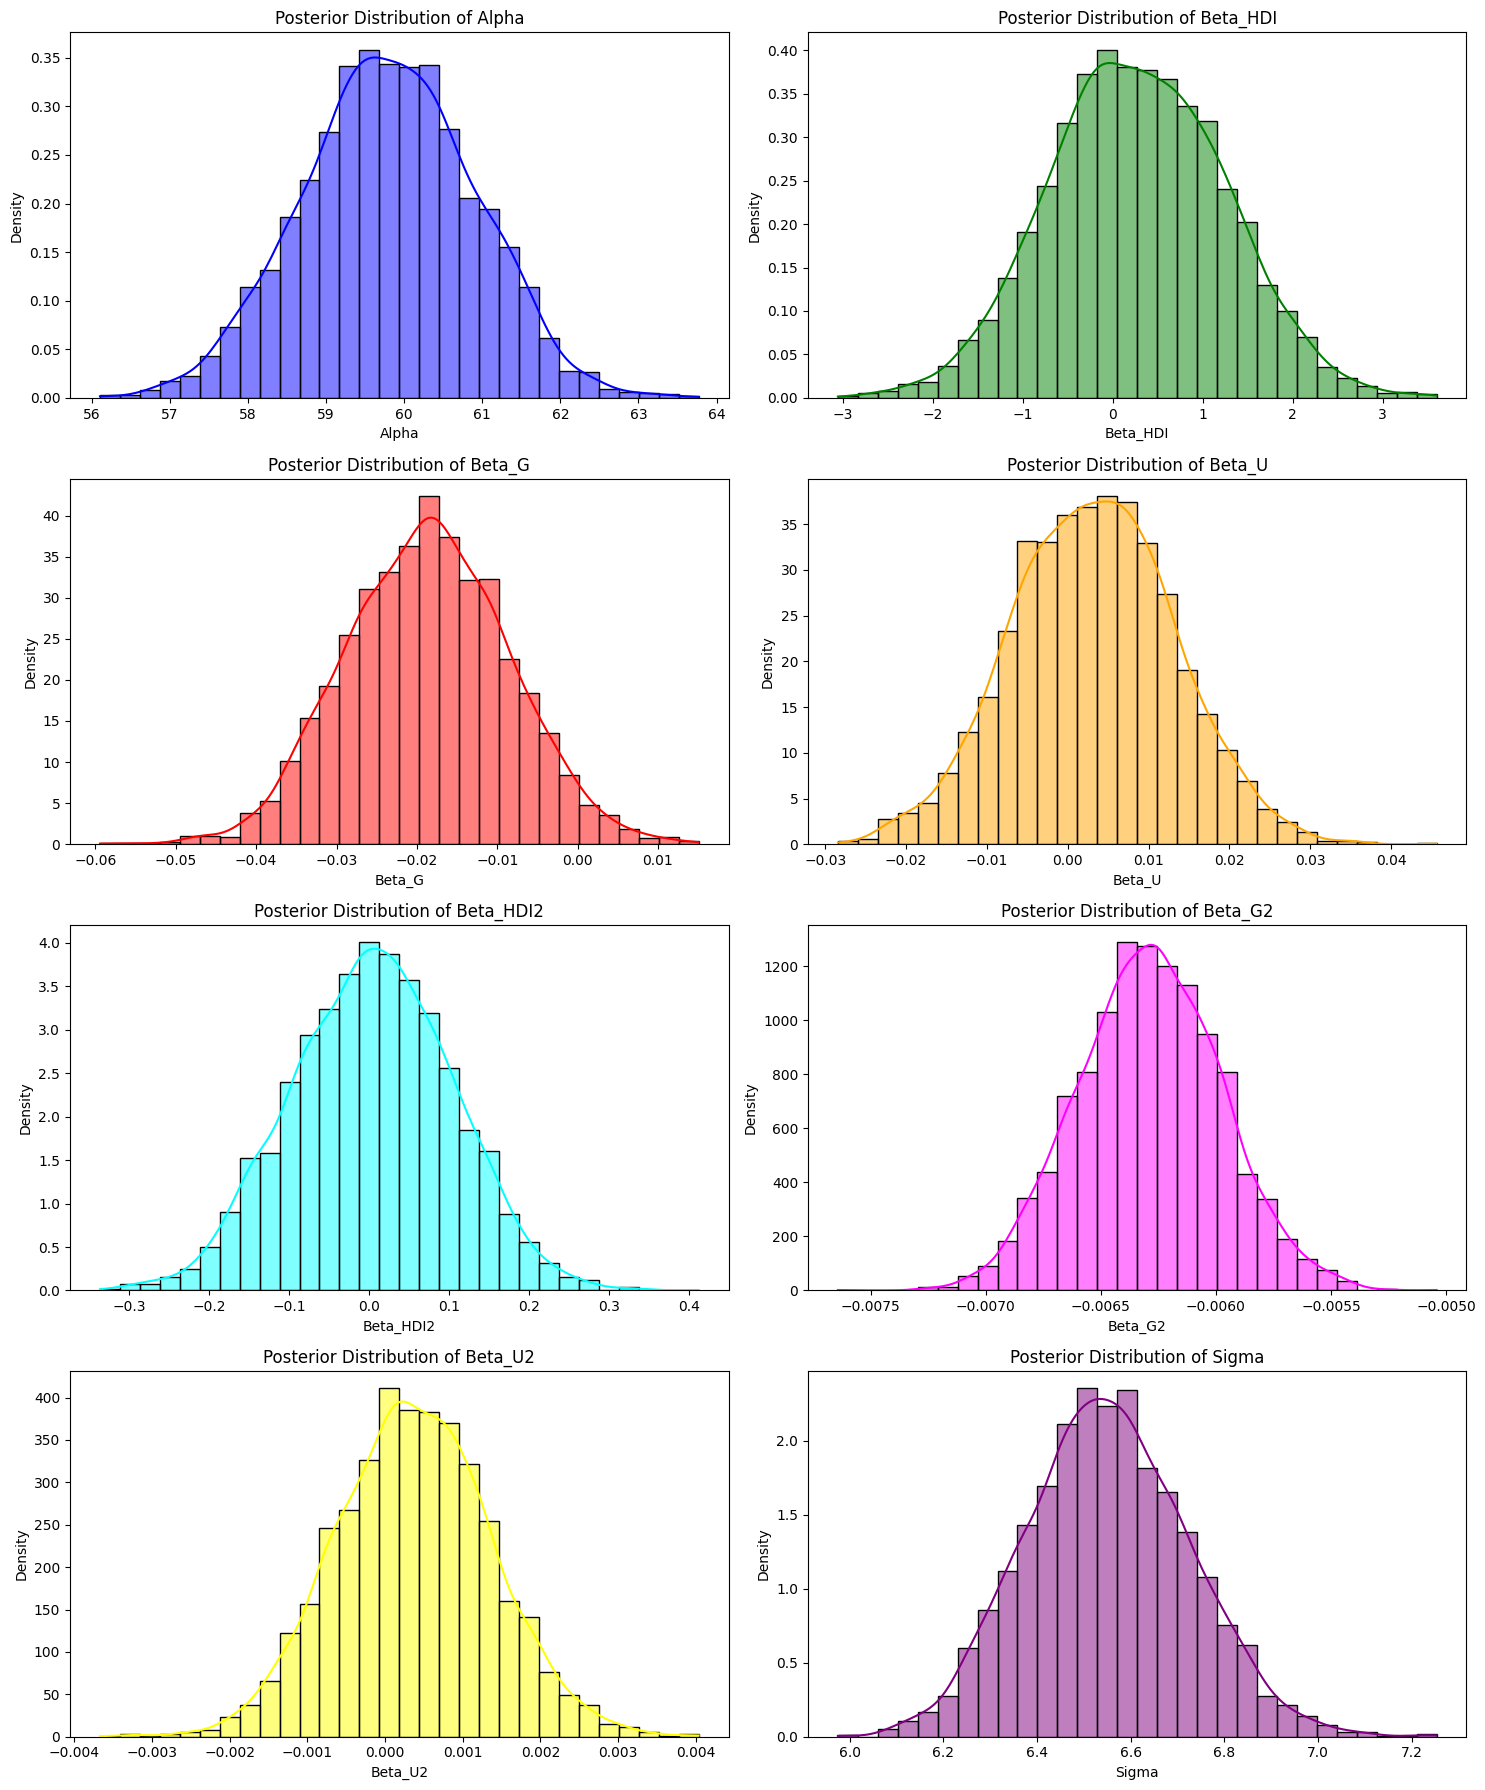

            count       mean       std        min        25%        50%  \
Alpha      4000.0  59.802345  1.109326  56.108100  59.068075  59.798100   
Beta_HDI   4000.0   0.271648  0.981064  -3.053200  -0.396845   0.257114   
Beta_G     4000.0  -0.018706  0.010147  -0.059437  -0.025730  -0.018590   
Beta_U     4000.0   0.003104  0.010061  -0.028431  -0.003917   0.003187   
Beta_HDI2  4000.0   0.003417  0.100455  -0.336779  -0.065532   0.004375   
Beta_G2    4000.0  -0.006287  0.000310  -0.007642  -0.006494  -0.006285   
Beta_U2    4000.0   0.000368  0.000998  -0.003670  -0.000308   0.000350   
Sigma      4000.0   6.551028  0.174202   5.974900   6.433805   6.545975   

                 75%        max  
Alpha      60.556600  63.769400  
Beta_HDI    0.949666   3.596840  
Beta_G     -0.011718   0.015061  
Beta_U      0.010051   0.045606  
Beta_HDI2   0.073251   0.411946  
Beta_G2    -0.006074  -0.005042  
Beta_U2     0.001030   0.004036  
Sigma       6.668838   7.253380  


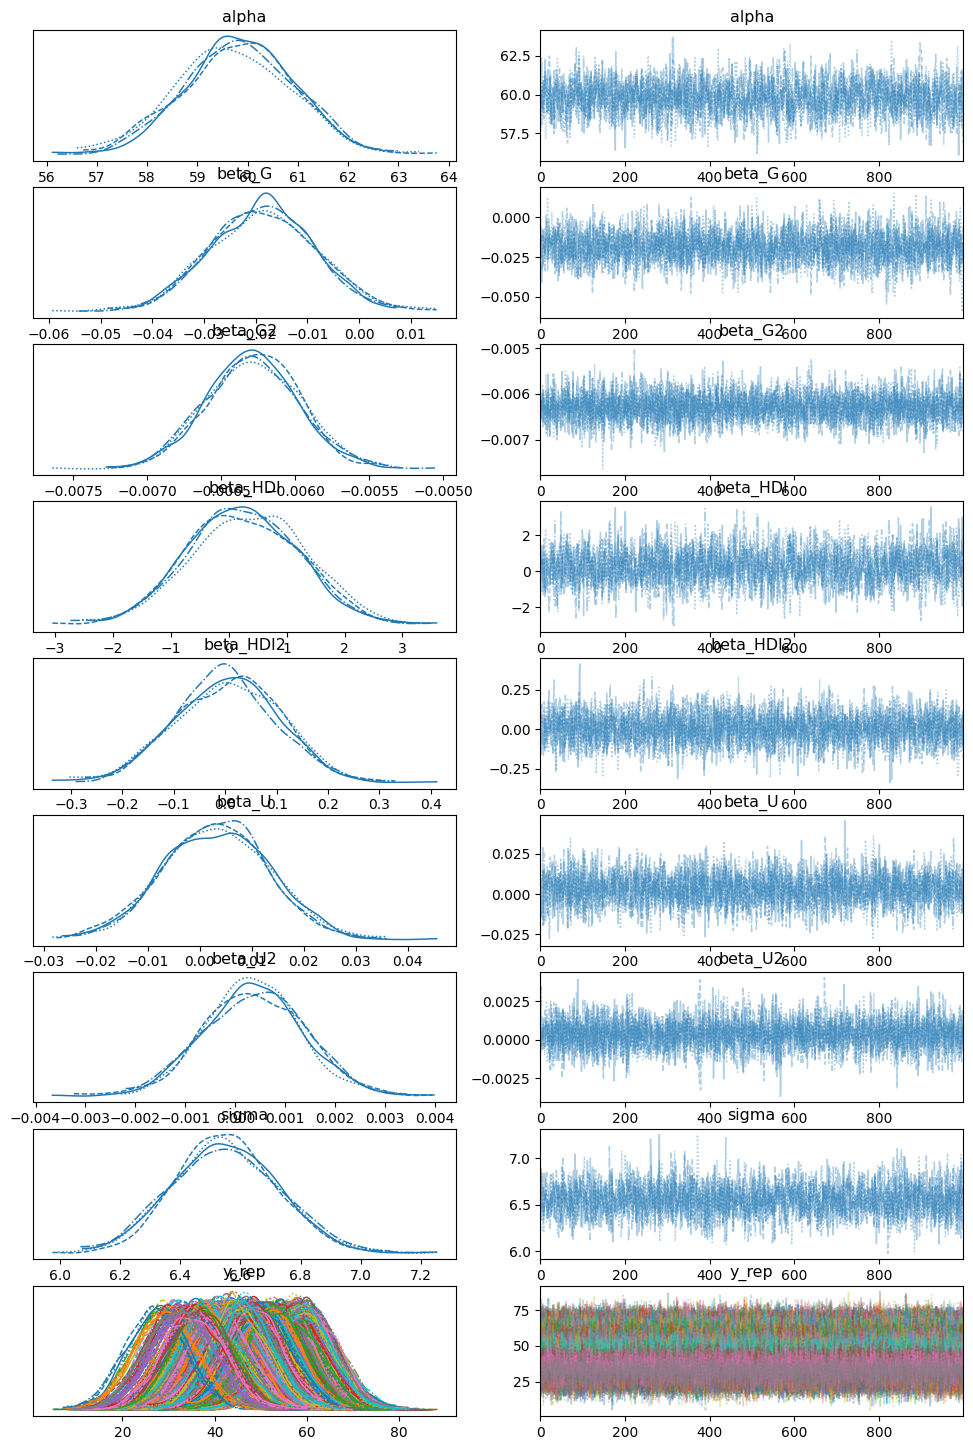

Processing csv files: C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\polynomial_posterioryi7wemvw\polynomial_posterior-20240706151853_1.csv, C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\polynomial_posterioryi7wemvw\polynomial_posterior-20240706151853_2.csv, C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\polynomial_posterioryi7wemvw\polynomial_posterior-20240706151853_3.csv, C:\Users\szczy\AppData\Local\Temp\tmpiftaqpfv\polynomial_posterioryi7wemvw\polynomial_posterior-20240706151853_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [29]:
import arviz as az

alpha_samples = fit_posterior.stan_variable('alpha')
beta_HDI_samples = fit_posterior.stan_variable('beta_HDI')
beta_G_samples = fit_posterior.stan_variable('beta_G')
beta_U_samples = fit_posterior.stan_variable('beta_U')
beta_HDI2_samples = fit_posterior.stan_variable('beta_HDI2')
beta_G2_samples = fit_posterior.stan_variable('beta_G2')
beta_U2_samples = fit_posterior.stan_variable('beta_U2')
sigma_samples = fit_posterior.stan_variable('sigma')

params_df = pd.DataFrame({
    'Alpha': alpha_samples,
    'Beta_HDI': beta_HDI_samples,
    'Beta_G': beta_G_samples,
    'Beta_U': beta_U_samples,
    'Beta_HDI2': beta_HDI2_samples,
    'Beta_G2': beta_G2_samples,
    'Beta_U2': beta_U2_samples,
    'Sigma': sigma_samples
})

bins = 30

fig, axes = plt.subplots(4, 2, figsize=(15, 18))
sns.histplot(params_df['Alpha'], bins=bins, kde=True, ax=axes[0, 0], stat="density", color='blue').set_title('Posterior Distribution of Alpha')
sns.histplot(params_df['Beta_HDI'], bins=bins, kde=True, ax=axes[0, 1], stat="density", color='green').set_title('Posterior Distribution of Beta_HDI')
sns.histplot(params_df['Beta_G'], bins=bins, kde=True, ax=axes[1, 0], stat="density", color='red').set_title('Posterior Distribution of Beta_G')
sns.histplot(params_df['Beta_U'], bins=bins, kde=True, ax=axes[1, 1], stat="density", color='orange').set_title('Posterior Distribution of Beta_U')
sns.histplot(params_df['Beta_HDI2'], bins=bins, kde=True, ax=axes[2, 0], stat="density", color='cyan').set_title('Posterior Distribution of Beta_HDI2')
sns.histplot(params_df['Beta_G2'], bins=bins, kde=True, ax=axes[2, 1], stat="density", color='magenta').set_title('Posterior Distribution of Beta_G2')
sns.histplot(params_df['Beta_U2'], bins=bins, kde=True, ax=axes[3, 0], stat="density", color='yellow').set_title('Posterior Distribution of Beta_U2')
sns.histplot(params_df['Sigma'], bins=bins, kde=True, ax=axes[3, 1], stat="density", color='purple').set_title('Posterior Distribution of Sigma')

plt.tight_layout()
plt.show()

params_summary = params_df.describe().T
print(params_summary)

az.plot_trace(fit_posterior)
plt.show()

print(fit_posterior.diagnose())

## Testing our final second model

In [30]:
def evaluate_model_with_seed(seed, data, y_rep_posterior):
    np.random.seed(seed)

    predicted_democratic_votes = []
    for i in range(len(data)):
        sample_value = np.random.choice(y_rep_posterior[:, i])
        predicted_democratic_votes.append(sample_value)

    predicted_df = pd.DataFrame({
        'Year': data['Year'],
        'Predicted_Democratic_%': predicted_democratic_votes
    })

    mean_predicted_democratic_votes = predicted_df.groupby('Year')['Predicted_Democratic_%'].mean().values

    mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values

    mse = np.mean((mean_predicted_democratic_votes - mean_democratic_votes) ** 2)
    
    return mse, mean_predicted_democratic_votes

seeds = range(0, 100)

best_seed = None
best_mse = float('inf')
best_predictions = None

for seed in seeds:
    mse, predictions = evaluate_model_with_seed(seed, data, y_rep_posterior)
    if mse < best_mse:
        best_mse = mse
        best_seed = seed
        best_predictions = predictions

print(f"Best Seed: {best_seed}")
print(f"Best MSE: {best_mse}")

unique_years = data['Year'].unique()

mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values

plt.figure(figsize=(10, 6))
plt.plot(unique_years, best_predictions, label="Predicted", marker='o')
plt.plot(unique_years, mean_democratic_votes, label="Actual", marker='x')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

Best Seed: 64
Best MSE: 2.4360719488869567


## Creating training and testing dataframes - model 2

In [31]:
data['Year'] = data['Year'].astype(int)

df_training = data[data['Year'] < 2020]
df_testing = data[data['Year'] == 2020]

print(f"Training dataset: {len(df_training)} rows")
print(f"Testing dataset: {len(df_testing)} rows")

stan_data_train = {
    'N': len(df_training),
    'HDI': df_training['HDI'].values,
    'G': df_training['Gun ownership %'].values,
    'U': df_training['Unemployment %'].values,
    'V': df_training['Democratic %'].values
}

stan_data_test = {
    'N': len(df_testing),
    'HDI': df_testing['HDI'].values,
    'G': df_testing['Gun ownership %'].values,
    'U': df_testing['Unemployment %'].values
}

Training dataset: 357 rows
Testing dataset: 51 rows


## Training the Model on the Training Dataset - model 2

In [32]:
stan_file_train = 'polynomial_posterior.stan'
model_train = CmdStanModel(stan_file=stan_file_train)

fit_train = model_train.sample(data=stan_data_train, chains=4, seed=53)

alpha_train = fit_train.stan_variable('alpha').mean()
beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
beta_G_train = fit_train.stan_variable('beta_G').mean()
beta_U_train = fit_train.stan_variable('beta_U').mean()
beta_HDI2_train = fit_train.stan_variable('beta_HDI2').mean()
beta_G2_train = fit_train.stan_variable('beta_G2').mean()
beta_U2_train = fit_train.stan_variable('beta_U2').mean()
sigma_train = fit_train.stan_variable('sigma').mean()

print(f"alpha: {alpha_train}")
print(f"beta_HDI: {beta_HDI_train}")
print(f"beta_G: {beta_G_train}")
print(f"beta_U: {beta_U_train}")
print(f"beta_HDI2: {beta_HDI2_train}")
print(f"beta_G2: {beta_G2_train}")
print(f"beta_U2: {beta_U2_train}")
print(f"sigma: {sigma_train}")

15:21:53 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)



































chain 1 |██▋       | 00:08 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:09 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:09 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████      | 00:09 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |████▌     | 00:10 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:10 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:10 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▎   | 00:11 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |██████▊   | 00:12 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:12 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:13 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:13 Iteration: 1500 / 2000 


15:22:08 - cmdstanpy - INFO - CmdStan done processing.



alpha: 59.1821836
beta_HDI: 0.1627657163008
beta_G: -0.018528903331195
beta_U: 0.0023508412671075
beta_HDI2: 0.0023988646201792497
beta_G2: -0.006087710045
beta_U2: 0.000278691373957375
sigma: 6.416230327499999


## Testing the Model on the Testing Dataset - model 2

In [33]:
predicted_votes_test = (
    alpha_train +
    beta_HDI_train * df_testing['HDI'] +
    beta_G_train * df_testing['Gun ownership %'] +
    beta_U_train * df_testing['Unemployment %'] +
    beta_HDI2_train * df_testing['HDI']**2 +
    beta_G2_train * df_testing['Gun ownership %']**2 +
    beta_U2_train * df_testing['Unemployment %']**2
)

mean_predicted_votes_2020 = predicted_votes_test.mean()

mean_actual_votes_2020 = df_testing['Democratic %'].mean()

print(f"Predicted mean Democratic votes for the whole country in 2020: {mean_predicted_votes_2020:.2f}%")
print(f"Actual mean Democratic votes for the whole country in 2020: {mean_actual_votes_2020:.2f}%")


Predicted mean Democratic votes for the whole country in 2020: 46.02%
Actual mean Democratic votes for the whole country in 2020: 48.65%


## MAE, MSE, RMSE, R2 - model 2

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(df_testing['Democratic %'].values, predicted_votes_test)
mse = mean_squared_error(df_testing['Democratic %'].values, predicted_votes_test)
rmse = np.sqrt(mse)
r2 = r2_score(df_testing['Democratic %'].values, predicted_votes_test)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error (MAE): 6.19
Mean Squared Error (MSE): 68.80
Root Mean Squared Error (RMSE): 8.29
R-squared: 0.52


# Dodać wykres z predykcji dla każdego roku bądź dla stanów - każdy z testowego - model 2

15:22:11 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:06 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:07 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   | 00:08 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:09 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 


15:22:24 - cmdstanpy - INFO - CmdStan done processing.


15:22:26 - cmdstanpy - INFO - CmdStan start processing


MSE for 1992: 1.5538717879485127


chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:08 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:09 Iteration: 1300 / 2000 [ 65%]  (Sampli


15:22:41 - cmdstanpy - INFO - CmdStan done processing.


15:22:44 - cmdstanpy - INFO - CmdStan start processing


MSE for 1996: 6.989819146812808


chain 1 |          | 00:00 Status








chain 1 |▉         | 00:02 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:04 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:05 Iteration:  200 / 2000 [ 10%]  (Warmup)





chain 1 |██▎       | 00:06 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:07 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:08 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:09 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:09 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:10 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:10 Iteration:  900 / 2000 [ 45%]  (Warmup)




chain 1 |█████▉    | 00:11 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:12 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:13 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:13 Iteration: 1300 / 20


15:23:01 - cmdstanpy - INFO - CmdStan done processing.


15:23:02 - cmdstanpy - INFO - CmdStan start processing


MSE for 2000: 1.1482364422271112


chain 1 |          | 00:00 Status




chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:05 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:06 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:07 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:08 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:09 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:09 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:10 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:11 Iteration: 1400 / 2000 [ 70%]  


15:23:18 - cmdstanpy - INFO - CmdStan done processing.


15:23:20 - cmdstanpy - INFO - CmdStan start processing


MSE for 2004: 6.009798344034465


chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)







chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:05 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:06 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:06 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:07 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:08 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:08 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:09 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:10 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:11 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:11 Iteration: 1400 / 2000 [ 70%] 


15:23:36 - cmdstanpy - INFO - CmdStan done processing.


15:23:38 - cmdstanpy - INFO - CmdStan start processing


MSE for 2008: 7.679048764038096


chain 1 |          | 00:00 Status







chain 1 |▉         | 00:03 Iteration:    1 / 2000 [  0%]  (Warmup)







chain 1 |█▎        | 00:05 Iteration:  100 / 2000 [  5%]  (Warmup)





chain 1 |█▊        | 00:06 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▎       | 00:07 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:08 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |███▏      | 00:09 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |███▋      | 00:10 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:10 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:11 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:12 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:12 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▎   | 00:13 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   | 00:14 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:14 Iteration: 1300 / 2000


15:23:56 - cmdstanpy - INFO - CmdStan done processing.


15:23:58 - cmdstanpy - INFO - CmdStan start processing


MSE for 2012: 1.8070257478672689


chain 1 |          | 00:00 Status










chain 1 |▉         | 00:03 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:04 Iteration:  100 / 2000 [  5%]  (Warmup)





chain 1 |█▊        | 00:05 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:06 Iteration:  300 / 2000 [ 15%]  (Warmup)





chain 1 |██▋       | 00:07 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:08 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:09 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:10 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:10 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:11 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:12 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:13 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |███████▋  | 00:13 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:14 Iteration: 1500 / 


15:24:14 - cmdstanpy - INFO - CmdStan done processing.


15:24:16 - cmdstanpy - INFO - CmdStan start processing


MSE for 2016: 16.85209749614958


chain 1 |          | 00:00 Status






chain 1 |▉         | 00:02 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▎        | 00:03 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:04 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▎       | 00:05 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:06 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:07 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:08 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:09 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:09 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:10 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:11 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:12 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:13 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:14 Iteration: 1300 / 2000 


15:24:34 - cmdstanpy - INFO - CmdStan done processing.



MSE for 2020: 6.933579956261755


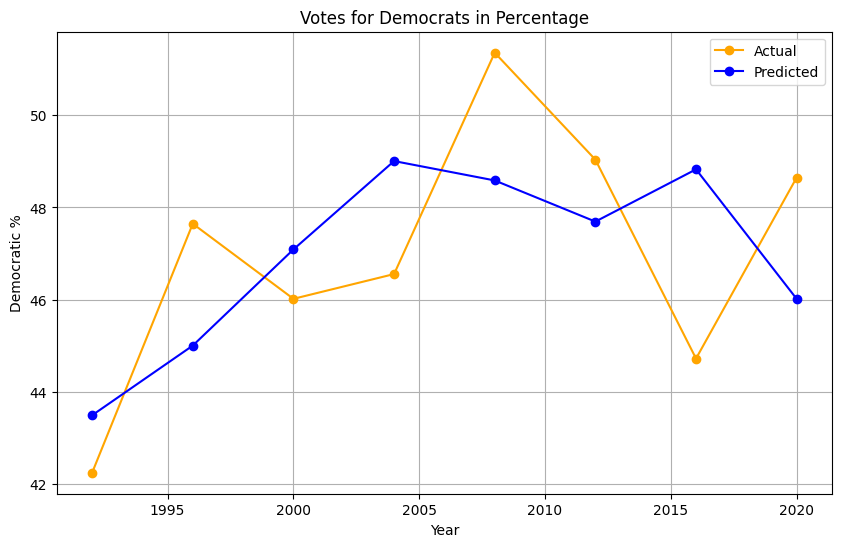

In [35]:
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(int)

def evaluate_model_with_seed(seed, data, model, stan_data_train):
    fit_train = model.sample(data=stan_data_train, chains=4, seed=seed)
    
    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()
    beta_U_train = fit_train.stan_variable('beta_U').mean()
    beta_HDI2_train = fit_train.stan_variable('beta_HDI2').mean()
    beta_G2_train = fit_train.stan_variable('beta_G2').mean()
    beta_U2_train = fit_train.stan_variable('beta_U2').mean()

    predicted_votes_test = (
        alpha_train + beta_HDI_train * data['HDI'] + beta_G_train * data['Gun ownership %']
        + beta_U_train * data['Unemployment %'] + beta_HDI2_train * data['HDI']**2 
        + beta_G2_train * data['Gun ownership %']**2 + beta_U2_train * data['Unemployment %']**2
    )

    mean_predicted_democratic_votes = predicted_votes_test.groupby(data['Year']).mean().values

    mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values

    mse = np.mean((mean_predicted_democratic_votes - mean_democratic_votes) ** 2)
    
    return mse, mean_predicted_democratic_votes

stan_file_train = 'polynomial_posterior.stan'
model = CmdStanModel(stan_file=stan_file_train)

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

for year in years:
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'U': df_training['Unemployment %'].values,
        'V': df_training['Democratic %'].values
    }

    mse, predictions = evaluate_model_with_seed(40, df_testing, model, stan_data_train)
    
    print(f"MSE for {year}: {mse}")
    all_predicted_votes.append(predictions.mean())
    all_actual_votes.append(df_testing['Democratic %'].mean())

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

## Testing the states:
Alabama
Arizona
District of Columbia
Florida
Kansas
Texas

15:24:37 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status








chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


15:24:40 - cmdstanpy - INFO - CmdStan done processing.


15:24:40 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status






chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:02 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:02 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)

c


15:24:43 - cmdstanpy - INFO - CmdStan done processing.


15:24:44 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
cha


15:24:46 - cmdstanpy - INFO - CmdStan done processing.


15:24:46 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)




chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       



15:24:48 - cmdstanpy - INFO - CmdStan done processing.


15:24:49 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)






chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████▍    | 00:01 Iteration: 1000 / 2000 [ 50%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
ch


15:24:51 - cmdstanpy - INFO - CmdStan done processing.


15:24:52 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       


15:24:54 - cmdstanpy - INFO - CmdStan done processing.


15:24:54 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)






chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       



15:24:56 - cmdstanpy - INFO - CmdStan done processing.


15:24:57 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status








chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)






chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)





chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████▍    | 00:01 Iteration: 1000 / 2000 [ 50%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


15:24:59 - cmdstanpy - INFO - CmdStan done processing.


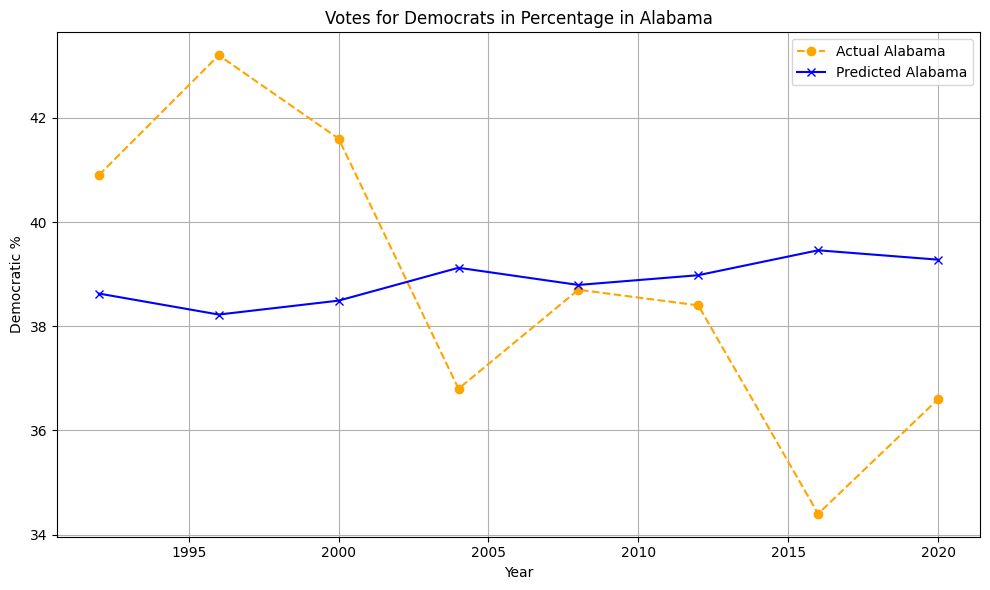

15:25:00 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
cha


15:25:02 - cmdstanpy - INFO - CmdStan done processing.
15:25:02 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
Consider re-running with show_console=True if the above output is unclear!


15:25:03 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status








chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:25:05 - cmdstanpy - INFO - CmdStan done processing.


15:25:05 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:25:07 - cmdstanpy - INFO - CmdStan done processing.


15:25:08 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status






chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain


15:25:10 - cmdstanpy - INFO - CmdStan done processing.


15:25:10 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status






chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:25:12 - cmdstanpy - INFO - CmdStan done processing.


15:25:13 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       


chain 4 |██████████| 00:02 Sampling c


15:25:15 - cmdstanpy - INFO - CmdStan done processing.


15:25:16 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status






chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:25:17 - cmdstanpy - INFO - CmdStan done processing.


15:25:18 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status






chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)





chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:25:19 - cmdstanpy - INFO - CmdStan done processing.


15:25:20 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:25:21 - cmdstanpy - INFO - CmdStan done processing.
15:25:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
Consider re-running with show_console=True if the above output is unclear!


15:25:21 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:25:22 - cmdstanpy - INFO - CmdStan done processing.
15:25:22 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
Consider re-running with show_console=True if the above output is unclear!


15:25:23 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status







chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:25:24 - cmdstanpy - INFO - CmdStan done processing.
15:25:24 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
Consider re-running with show_console=True if the above output is unclear!


15:25:24 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:25:25 - cmdstanpy - INFO - CmdStan done processing.
15:25:25 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
Consider re-running with show_console=True if the above output is unclear!


15:25:26 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:25:27 - cmdstanpy - INFO - CmdStan done processing.
15:25:27 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
Consider re-running with show_console=True if the above output is unclear!


15:25:27 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)





chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:25:29 - cmdstanpy - INFO - CmdStan done processing.
15:25:29 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
Consider re-running with show_console=True if the above output is unclear!


15:25:29 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:25:30 - cmdstanpy - INFO - CmdStan done processing.
15:25:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
Consider re-running with show_console=True if the above output is unclear!


15:25:31 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


15:25:31 - cmdstanpy - INFO - CmdStan done processing.
15:25:31 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
Consider re-running with show_console=True if the above output is unclear!


15:25:32 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status







chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:25:34 - cmdstanpy - INFO - CmdStan done processing.


15:25:35 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status






chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:25:36 - cmdstanpy - INFO - CmdStan done processing.


15:25:37 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status












chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:25:38 - cmdstanpy - INFO - CmdStan done processing.


15:25:39 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:25:40 - cmdstanpy - INFO - CmdStan done processing.
15:25:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_posterior.stan', line 32, column 2 to line 34, column 54)
Consider re-running with show_console=True if the above output is unclear!


15:25:41 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)



chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:25:42 - cmdstanpy - INFO - CmdStan done processing.


15:25:43 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status













chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:25:44 - cmdstanpy - INFO - CmdStan done processing.


15:25:44 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status











chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:25:46 - cmdstanpy - INFO - CmdStan done processing.


15:25:46 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status






chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       

15:25:47 - cmdstanpy - INFO - CmdStan done processing.


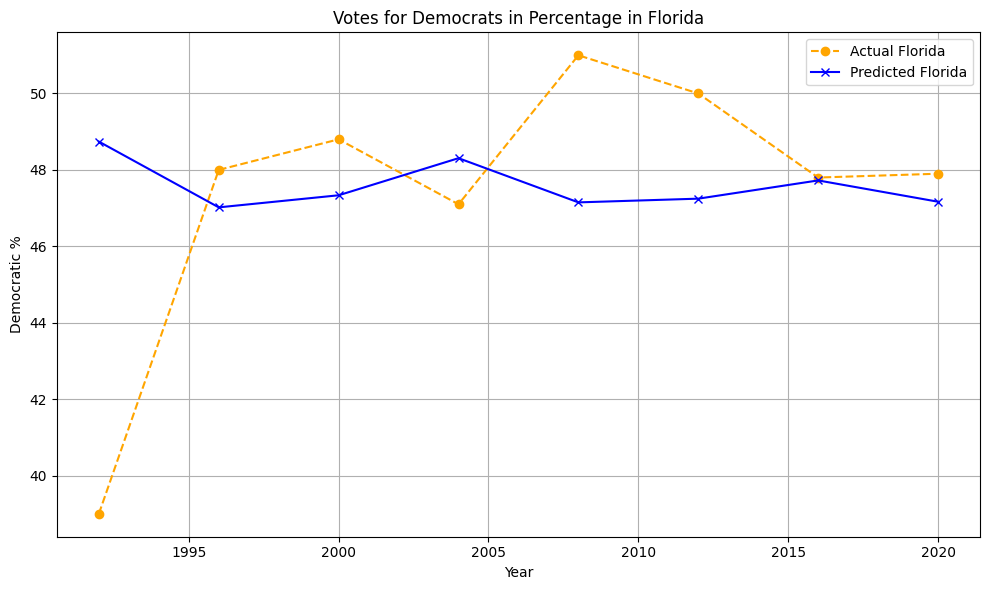

15:25:49 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)





chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |


15:25:50 - cmdstanpy - INFO - CmdStan done processing.


15:25:51 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:25:53 - cmdstanpy - INFO - CmdStan done processing.


15:25:53 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:25:55 - cmdstanpy - INFO - CmdStan done processing.


15:25:56 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)






chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:25:57 - cmdstanpy - INFO - CmdStan done processing.


15:25:58 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain


15:26:00 - cmdstanpy - INFO - CmdStan done processing.


15:26:01 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)







chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       


15:26:03 - cmdstanpy - INFO - CmdStan done processing.


15:26:03 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)





chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chai


15:26:05 - cmdstanpy - INFO - CmdStan done processing.


15:26:05 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:0


15:26:08 - cmdstanpy - INFO - CmdStan done processing.


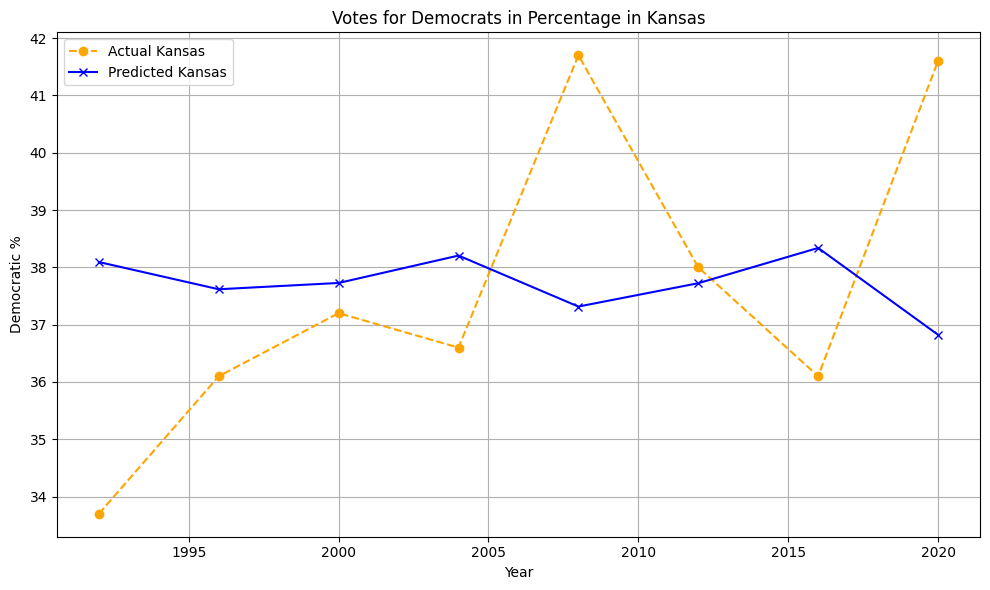

15:26:08 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status







chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:26:10 - cmdstanpy - INFO - CmdStan done processing.


15:26:10 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status








chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:26:12 - cmdstanpy - INFO - CmdStan done processing.


15:26:13 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       

15:26:14 - cmdstanpy - INFO - CmdStan done processing.


15:26:15 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:26:16 - cmdstanpy - INFO - CmdStan done processing.


15:26:17 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:26:19 - cmdstanpy - INFO - CmdStan done processing.


15:26:19 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:26:21 - cmdstanpy - INFO - CmdStan done processing.


15:26:21 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:26:23 - cmdstanpy - INFO - CmdStan done processing.


15:26:23 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


15:26:25 - cmdstanpy - INFO - CmdStan done processing.


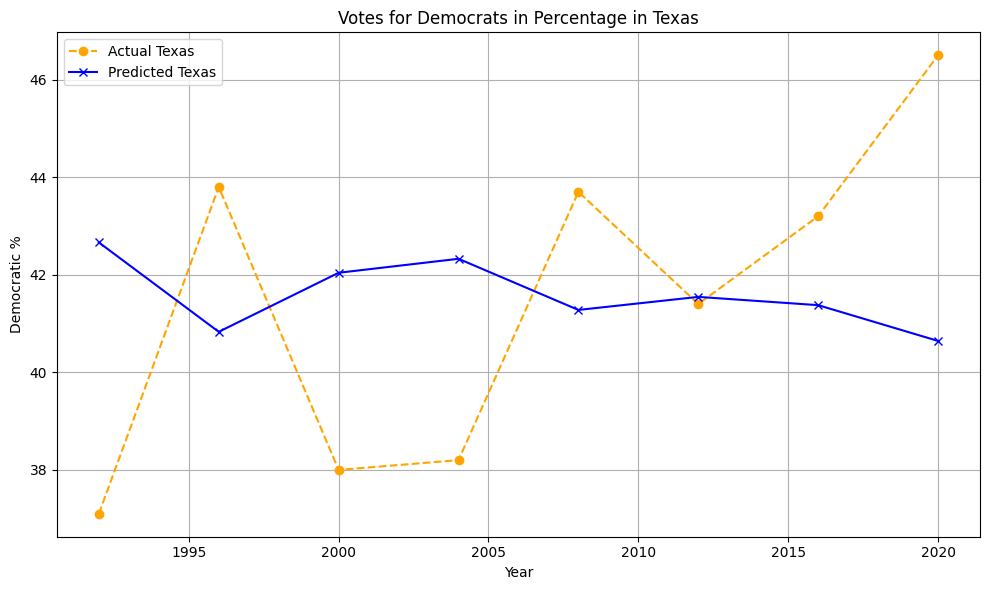

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(int)

def train_and_predict_state(state, years):
    state_data = data[data['State'] == state]
    
    actuals = []
    predictions = []

    for year in years:
        df_training = state_data[state_data['Year'] != year]
        df_testing = state_data[state_data['Year'] == year]

        if df_testing.empty:
            continue
        
        stan_data_train = {
            'N': len(df_training),
            'HDI': df_training['HDI'].values,
            'G': df_training['Gun ownership %'].values,
            'U': df_training['Unemployment %'].values,
            'V': df_training['Democratic %'].values
        }

        stan_file_train = 'polynomial_posterior.stan'
        model = CmdStanModel(stan_file=stan_file_train)
        fit_train = model.sample(data=stan_data_train, chains=4, seed=64)

        alpha_train = fit_train.stan_variable('alpha').mean()
        beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
        beta_G_train = fit_train.stan_variable('beta_G').mean()
        beta_U_train = fit_train.stan_variable('beta_U').mean()
        beta_HDI2_train = fit_train.stan_variable('beta_HDI2').mean()
        beta_G2_train = fit_train.stan_variable('beta_G2').mean()
        beta_U2_train = fit_train.stan_variable('beta_U2').mean()

        predicted_votes_test = (
            alpha_train + beta_HDI_train * df_testing['HDI'].values + beta_G_train * df_testing['Gun ownership %'].values
            + beta_U_train * df_testing['Unemployment %'].values + beta_HDI2_train * df_testing['HDI'].values**2 
            + beta_G2_train * df_testing['Gun ownership %'].values**2 + beta_U2_train * df_testing['Unemployment %'].values**2
        )

        predictions.append(predicted_votes_test.mean())
        actuals.append(df_testing['Democratic %'].mean())
    
    return actuals, predictions

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

states = ['Alabama', 'Arizona', 'District of Columbia', 'Florida', 'Kansas', 'Texas']

for state in states:
    actuals, predictions = train_and_predict_state(state, years)
    plt.figure(figsize=(10, 6))
    plt.plot(years, actuals, label=f'Actual {state}', linestyle='--', marker='o', color='orange')
    plt.plot(years, predictions, label=f'Predicted {state}', linestyle='-', marker='x', color='blue')
    plt.xlabel('Year')
    plt.ylabel('Democratic %')
    plt.title(f'Votes for Democrats in Percentage in {state}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Model comparison - linear vs polynomial model

15:26:26 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)





chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:02 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |███████▎  | 00:03 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:03 Iteration: 1400 / 2000 [ 70%]  (Sampling


15:26:32 - cmdstanpy - INFO - CmdStan done processing.


15:26:32 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▊        | 00:04 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:04 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:06 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:06 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |███▋      | 00:07 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:08 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:09 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:09 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:10 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:11 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:12 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |███████▎  | 00:13 Iteration: 1300 / 2000 [ 65%]  (Sampling)


cha


15:26:52 - cmdstanpy - INFO - CmdStan done processing.


c:\Users\szczy\anaconda3\envs\stan\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\szczy\anaconda3\envs\stan\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


WAIC for model 1: Computed from 4000 posterior samples and 408 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -1380.20    25.53
p_waic        5.64        -

There has been a warning during the calculation. Please check the results.
WAIC for model 2: Computed from 4000 posterior samples and 408 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -1420.64    32.76
p_waic        6.17        -

There has been a warning during the calculation. Please check the results.
PSIS-LOO for model 1: Computed from 4000 posterior samples and 408 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -1380.20    25.53
p_loo        5.64        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      408  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

PSIS-LOO for model 2: Computed from 4000 posterior samples and 408 o

c:\Users\szczy\anaconda3\envs\stan\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\szczy\anaconda3\envs\stan\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


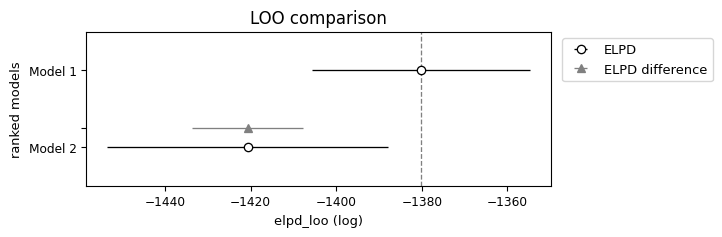

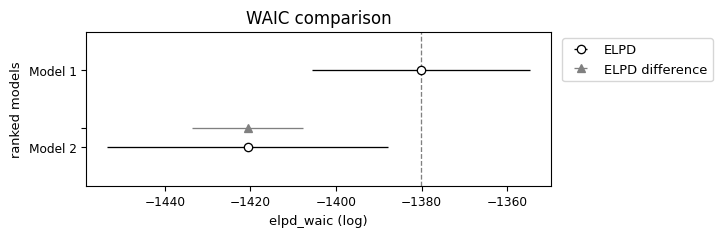

In [37]:
import arviz as az
import pandas as pd
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(int)

stan_data_model1 = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values,
    'y': data['Democratic %'].values
}

stan_data_model2 = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values,
    'V': data['Democratic %'].values
}

model1_file = 'model1_posterior.stan'
model1 = CmdStanModel(stan_file=model1_file)
fit1 = model1.sample(data=stan_data_model1, chains=4, seed=96)

model2_file = 'polynomial_posterior.stan'
model2 = CmdStanModel(stan_file=model2_file)
fit2 = model2.sample(data=stan_data_model2, chains=4, seed=64)

az_data1 = az.from_cmdstanpy(
    posterior=fit1,
    observed_data={"y": stan_data_model1["y"]},
    log_likelihood="log_lik"
)
az_data2 = az.from_cmdstanpy(
    posterior=fit2,
    observed_data={"V": stan_data_model2["V"]},
    log_likelihood="log_lik"
)

waic1 = az.waic(az_data1)
waic2 = az.waic(az_data2)
loo1 = az.loo(az_data1)
loo2 = az.loo(az_data2)

print("WAIC for model 1:", waic1)
print("WAIC for model 2:", waic2)
print("PSIS-LOO for model 1:", loo1)
print("PSIS-LOO for model 2:", loo2)

if waic1.elpd_waic < waic2.elpd_waic:
    print("Model 1 ma lepsze dopasowanie według WAIC.")
else:
    print("Model 2 ma lepsze dopasowanie według WAIC.")

if loo1.elpd_loo < loo2.elpd_loo:
    print("Model 1 ma lepsze dopasowanie według PSIS-LOO.")
else:
    print("Model 2 ma lepsze dopasowanie według PSIS-LOO.")

compare_dict = {"Model 1": az_data1, "Model 2": az_data2}
loo_compare = az.compare(compare_dict, ic='loo')
waic_compare = az.compare(compare_dict, ic='waic')

az.plot_compare(loo_compare)
plt.title("LOO comparison")
plt.show()

az.plot_compare(waic_compare)
plt.title("WAIC comparison")
plt.show()

## Compare models with different numbers of predictors - linear model

15:26:59 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:02 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:02 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:02 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:03 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |███████▎  | 00:03 Iteration: 1300 / 2000 [ 65%]  (Sampling)


ch


15:27:04 - cmdstanpy - INFO - CmdStan done processing.


15:27:05 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:02 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:02 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:03 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:03 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:03 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:04 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |█████▉    | 00:04 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:05 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:06 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:06 Iteration: 1300 / 2000 [ 65%]  (Sampling)


c


15:27:15 - cmdstanpy - INFO - CmdStan done processing.


15:27:16 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:02 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:03 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:04 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:05 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:05 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |███▋      | 00:06 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:07 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:07 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:08 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:09 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:10 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:11 Iteration: 1200 / 2000 [ 60%]  (Sampling)


cha


15:27:35 - cmdstanpy - INFO - CmdStan done processing.


c:\Users\szczy\anaconda3\envs\stan\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\szczy\anaconda3\envs\stan\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


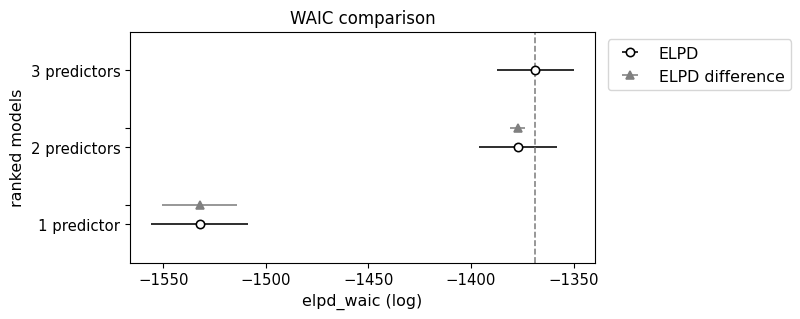

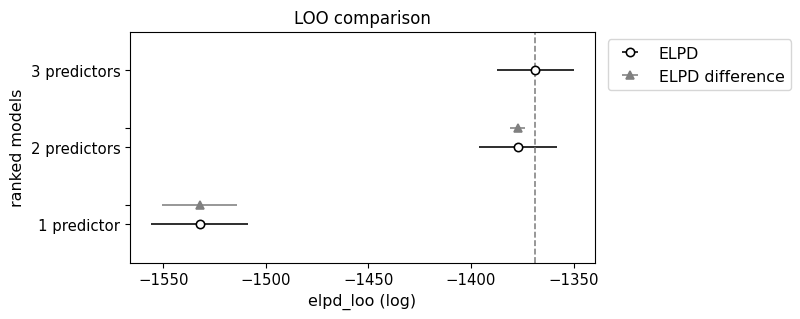

WAIC dla modelu z jednym predyktorem: Computed from 4000 posterior samples and 408 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -1532.27    23.61
p_waic        4.57        -
WAIC dla modelu z dwoma predyktorami: Computed from 4000 posterior samples and 408 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -1377.28    19.00
p_waic        5.81        -

There has been a warning during the calculation. Please check the results.
WAIC dla modelu z trzema predyktorami: Computed from 4000 posterior samples and 408 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -1368.64    18.78
p_waic        6.22        -
PSIS-LOO dla modelu z jednym predyktorem: Computed from 4000 posterior samples and 408 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -1532.28    23.61
p_loo        4.58        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      408  1

In [38]:
import arviz as az
import pandas as pd
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(int)

stan_data_model1 = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'y': data['Democratic %'].values
}

stan_data_model2 = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'y': data['Democratic %'].values
}

stan_data_model3 = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values,
    'y': data['Democratic %'].values
}

model1_file = 'model_1.stan'
model1 = CmdStanModel(stan_file=model1_file)
fit1 = model1.sample(data=stan_data_model1, chains=4, seed=96)

model2_file = 'model_2.stan'
model2 = CmdStanModel(stan_file=model2_file)
fit2 = model2.sample(data=stan_data_model2, chains=4, seed=96)

model3_file = 'model_3.stan'
model3 = CmdStanModel(stan_file=model3_file)
fit3 = model3.sample(data=stan_data_model3, chains=4, seed=96)

az_data1 = az.from_cmdstanpy(
    posterior=fit1,
    observed_data={"y": stan_data_model1["y"]},
    log_likelihood="log_lik"
)
az_data2 = az.from_cmdstanpy(
    posterior=fit2,
    observed_data={"y": stan_data_model2["y"]},
    log_likelihood="log_lik"
)
az_data3 = az.from_cmdstanpy(
    posterior=fit3,
    observed_data={"y": stan_data_model3["y"]},
    log_likelihood="log_lik"
)

waic1 = az.waic(az_data1)
waic2 = az.waic(az_data2)
waic3 = az.waic(az_data3)

loo1 = az.loo(az_data1)
loo2 = az.loo(az_data2)
loo3 = az.loo(az_data3)

compare_dict = {"1 predictor": az_data1, "2 predictors": az_data2, "3 predictors": az_data3}
waic_compare = az.compare(compare_dict, ic='waic')
loo_compare = az.compare(compare_dict, ic='loo')

az.plot_compare(waic_compare)
plt.title("WAIC comparison")
plt.show()

az.plot_compare(loo_compare)
plt.title("LOO comparison")
plt.show()

print("WAIC dla modelu z jednym predyktorem:", waic1)
print("WAIC dla modelu z dwoma predyktorami:", waic2)
print("WAIC dla modelu z trzema predyktorami:", waic3)

print("PSIS-LOO dla modelu z jednym predyktorem:", loo1)
print("PSIS-LOO dla modelu z dwoma predyktorami:", loo2)
print("PSIS-LOO dla modelu z trzema predyktorami:", loo3)

## Comparing number of predictors in polynomial model

15:27:44 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                      


15:27:47 - cmdstanpy - INFO - CmdStan done processing.


15:27:48 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)






chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:03 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:04 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |████▌     | 00:04 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:05 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:05 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▎   | 00:06 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:07 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:07 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:08 Iteration: 1400 / 2000 [ 70%]  (Sampling)



c


15:28:01 - cmdstanpy - INFO - CmdStan done processing.


15:28:02 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)








chain 1 |█▊        | 00:03 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:05 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:06 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████      | 00:06 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:07 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:08 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:09 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:09 Iteration: 1100 / 2000 [ 55%]  (Sampling)




chain 1 |██████▊   | 00:10 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:11 Iteration: 1300 / 2000 [ 65%]  (Sampling)



15:28:19 - cmdstanpy - INFO - CmdStan done processing.


c:\Users\szczy\anaconda3\envs\stan\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\szczy\anaconda3\envs\stan\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\szczy\anaconda3\envs\stan\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\szczy\anaconda3\envs\stan\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: F

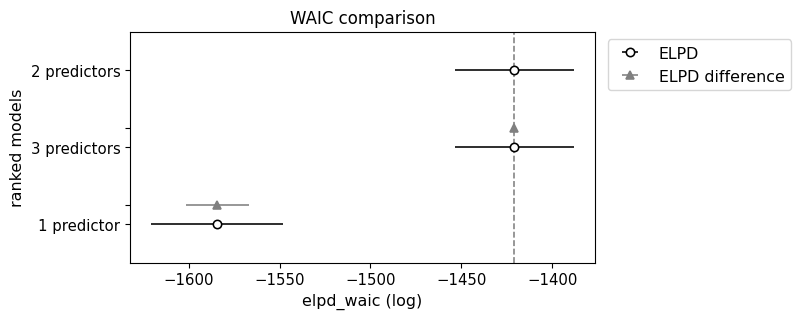

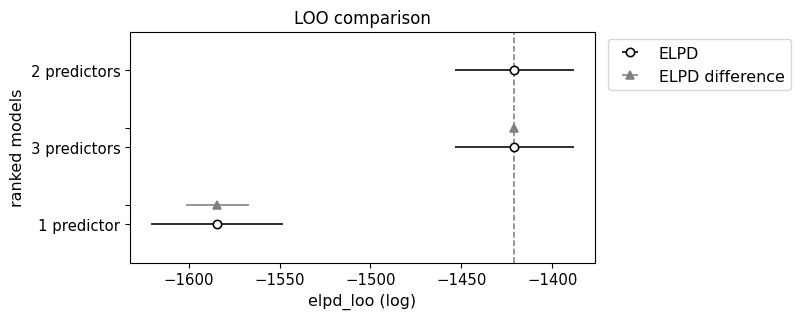

WAIC dla modelu z jednym predyktorem: Computed from 4000 posterior samples and 408 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -1584.30    36.34
p_waic        4.28        -

There has been a warning during the calculation. Please check the results.
WAIC dla modelu z dwoma predyktorami: Computed from 4000 posterior samples and 408 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -1420.75    32.73
p_waic        6.09        -

There has been a warning during the calculation. Please check the results.
WAIC dla modelu z trzema predyktorami: Computed from 4000 posterior samples and 408 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -1420.84    32.81
p_waic        6.29        -

There has been a warning during the calculation. Please check the results.
PSIS-LOO dla modelu z jednym predyktorem: Computed from 4000 posterior samples and 408 observations log-likelihood matrix.

         Estimate       SE
elpd_loo

In [39]:
import arviz as az
import pandas as pd
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

file_path = 'data/main_data2.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(int)

stan_data_model1 = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'V': data['Democratic %'].values
}

stan_data_model2 = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'V': data['Democratic %'].values
}

stan_data_model3 = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values,
    'V': data['Democratic %'].values
}

model1_file = 'model11.stan'
model1 = CmdStanModel(stan_file=model1_file)
fit1 = model1.sample(data=stan_data_model1, chains=4, seed=96)

model2_file = 'model22.stan'
model2 = CmdStanModel(stan_file=model2_file)
fit2 = model2.sample(data=stan_data_model2, chains=4, seed=96)

model3_file = 'model33.stan'
model3 = CmdStanModel(stan_file=model3_file)
fit3 = model3.sample(data=stan_data_model3, chains=4, seed=96)

az_data1 = az.from_cmdstanpy(
    posterior=fit1,
    observed_data={"V": stan_data_model1["V"]},
    log_likelihood="log_lik"
)
az_data2 = az.from_cmdstanpy(
    posterior=fit2,
    observed_data={"V": stan_data_model2["V"]},
    log_likelihood="log_lik"
)
az_data3 = az.from_cmdstanpy(
    posterior=fit3,
    observed_data={"V": stan_data_model3["V"]},
    log_likelihood="log_lik"
)

waic1 = az.waic(az_data1)
waic2 = az.waic(az_data2)
waic3 = az.waic(az_data3)

loo1 = az.loo(az_data1)
loo2 = az.loo(az_data2)
loo3 = az.loo(az_data3)

compare_dict = {"1 predictor": az_data1, "2 predictors": az_data2, "3 predictors": az_data3}
waic_compare = az.compare(compare_dict, ic='waic')
loo_compare = az.compare(compare_dict, ic='loo')

az.plot_compare(waic_compare)
plt.title("WAIC comparison")
plt.show()

az.plot_compare(loo_compare)
plt.title("LOO comparison")
plt.show()

print("WAIC dla modelu z jednym predyktorem:", waic1)
print("WAIC dla modelu z dwoma predyktorami:", waic2)
print("WAIC dla modelu z trzema predyktorami:", waic3)

print("PSIS-LOO dla modelu z jednym predyktorem:", loo1)
print("PSIS-LOO dla modelu z dwoma predyktorami:", loo2)
print("PSIS-LOO dla modelu z trzema predyktorami:", loo3)